# **WQD7006 : MACHINE LEARNING**

# Title: Predictive Modeling for Proactive Departure Delay Management in Airline Operations using Machine Learning






# Introduction (Business Understanding)

## Data Understanding

This project has chosen a dataset related to flight details which consists of numerous attributes such as 'Year', 'DayOfWeek', 'FlightDate', 'Flight_Number_Reporting_Airline', 'WeatherDelay', 'LateAircraftDelay' and other various attributes. It is imperative to utilize this data to enhance our understanding regarding the patterns and performance of flights, as well as identifying factors that contribute to delays or cancellations.

## Business Goal

Minimize operational disruptions and enhance customer satisfaction by proactively managing departure delays for the airline. The goal is to develop a predictive model that identifies potential delays exceeding a two-hour threshold, enabling the airline to take preemptive actions and improve on-time departure performance.

## Research Objective

Utilize historical flight data to create a robust predictive model capable of forecasting departure delays exceeding two hours. The objective is to leverage machine learning algorithms to accurately anticipate and classify instances where flights are likely to experience delays surpassing the specified threshold. By identifying these potential extended delays in advance, the aim is to empower the airline's operations team to implement proactive measures, optimize resource allocation, and enhance operational efficiency

# Loading Dataset

In [1]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read csv file from Google Drive
from google.colab import drive
drive.mount('/content/drive')
flight = pd.read_csv('/content/drive/MyDrive/Datasets/2019 flight dataset.csv', low_memory=False)



Mounted at /content/drive


# Data Preprocessing

In [3]:
# Display the first 10 rows
flight.head(10)

,Year,Month,Day,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
0,2019,1,4,5,1/4/2019,OO,20304,OO,N945SW,5657,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2019,1,4,5,1/4/2019,OO,20304,OO,N932SW,5658,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2019,1,4,5,1/4/2019,OO,20304,OO,N932SW,5658,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2019,1,4,5,1/4/2019,OO,20304,OO,N916SW,5659,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2019,1,4,5,1/4/2019,OO,20304,OO,N107SY,5660,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2019,1,4,5,1/4/2019,OO,20304,OO,N114SY,5661,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,2019,1,4,5,1/4/2019,OO,20304,OO,N945SW,5664,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2019,1,4,5,1/4/2019,OO,20304,OO,N679SA,5665,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2019,1,4,5,1/4/2019,OO,20304,OO,N925SW,5667,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2019,1,4,5,1/4/2019,OO,20304,OO,N145SY,5668,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Display the dataset size
print (" This dataset size is:\n\n",flight.shape)

 This dataset size is:

 (583985, 64)


In [5]:
# Comprehensive overview of the dataset's numerical characteristics
pd.set_option('display.max_columns', None)
flight.describe()

,Year,Month,Day,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
count,583985.0,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,583985.000000,583985.000000,583985.000000,567632.000000,567630.000000,567630.000000,567630.000000,567630.000000,567369.000000,567369.000000,566924.000000,566924.000000,583985.000000,566924.000000,565963.000000,565963.000000,565963.000000,565963.000000,583985.000000,583985.000000,583851.000000,565963.000000,565963.000000,583985.0,583985.000000,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000,3962.000000,3962.000000,3962.000000,583985.000000
mean,2019.0,1.0,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,31753.325344,26.850369,54.010646,12659.470015,1.265951e+06,31753.161300,26.854303,54.011817,1326.266642,1331.957728,9.766091,13.258226,0.174281,0.005257,18.331121,1358.531945,1479.012464,7.597733,1502.665556,1484.315921,4.257506,13.654539,0.185917,-0.247571,0.028641,0.002219,143.557401,138.610077,112.694461,1.0,797.746524,3.664861,20.106080,4.428551,18.508392,0.079508,24.950590,1278.071933,37.506815,36.776628,0.003935
std,0.0,0.0,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1298.582915,16.506263,26.155187,1519.336466,1.519334e+05,1298.389294,16.505714,26.154263,484.081000,495.404329,48.626941,47.507390,0.379351,2.220070,10.895553,495.559276,519.189036,5.996932,505.350299,523.162855,51.159511,47.488893,0.389040,2.382279,0.166796,0.047056,73.216303,73.078565,71.195757,0.0,589.999795,2.323890,65.762202,38.535323,41.726392,3.203342,50.851973,510.584001,31.837723,30.090092,0.132386
min,2019.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,1.000000,1.000000,-47.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-85.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,20.000000,16.000000,4.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000
25%,2019.0,1.0,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,30721.000000,12.000000,34.000000,11292.000000,1.129202e+06,30721.000000,12.000000,34.000000,917.000000,921.000000,-6.000000,0.000000,0.000000,-1.000000,12.000000,938.000000,1059.000000,4.000000,1115.000000,1104.000000,-16.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,90.000000,85.000000,61.000000,1.0,363.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,824.000000,16.000000,16.000000,0.000000
50%,2019.0,1.0,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,31453.000000,26.000000,44.000000,12889.000000,1.288903e+06,31453.000000,26.000000,44.000000,1320.000000,1328.000000,-3.000000,0.000000,0.000000,-1.000000,15.000000,1343.000000,1512.000000,6.000000,1525.000000,1517.000000,-7.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,125.000000,121.000000,94.000000,1.0,640.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1228.000000,29.000000,28.000000,0.000000
75%,2019.0,1.0,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,32467.000000,42.000000,81.000000,13931.000000,1.393102e+06,32467.000000,42.000000,81.000000,1730.000000,1738.000000,5.000000,5.000000,0.000000,0.

In [49]:
# Count of Unique values in respective column

uniqueValues = flight.nunique().sort_values(ascending=True)
pd.set_option('display.max_rows', None)
print('Count of unique values in each column :\n')
print(uniqueValues)

Count of unique values in each column :

Year                                  1
Month                                 1
Flights                               1
Diverted                              2
Cancelled                             2
ArrDel15                              2
DepDel15                              2
CancellationCode                      4
DivAirportLandings                    4
DayOfWeek                             7
DistanceGroup                        11
DepartureDelayGroups                 13
ArrivalDelayGroups                   15
IATA_CODE_Reporting_Airline          17
Reporting_Airline                    17
DOT_ID_Reporting_Airline             17
ArrTimeBlk                           19
DepTimeBlk                           19
FlightDate                           31
Day                                  31
OriginStateFips                      52
OriginState                          52
DestWac                              52
DestStateFips                        52

In [7]:
# Display missing values and data type for every column
def missing_values_table(flight):
        missing_vals = flight.isnull().sum(axis = 0)
        count_missing_cols = flight.isnull().sum (axis=1)
        missing_vals_percent = 100 * flight.isnull().sum() / len(flight)

        missing_vals_tbl = pd.concat([missing_vals, missing_vals_percent], axis=1)

        missing_vals_tbl = missing_vals_tbl.rename(columns =
                           {0 : 'Missing Values', 1 : '% of Missing Values'})

        missing_vals_tbl['Data Type'] = flight.dtypes
        #missing_vals_tbl = missing_vals_tbl[missing_vals_tbl.iloc[:,1] != 0].sort_values(
                          # '% of Total Values', ascending=False).round(1)

        print ("The airline dataset has " + str(flight.shape[0]) + " rows and " + str(flight.shape[1]) + " columns.\n")
       # print ("There are " + str(count_missing_cols) + " columns that have missing values.")
        return missing_vals_tbl
pd.set_option('display.max_rows', None)
missing_values_table(flight)

The airline dataset has 583985 rows and 64 columns.



,Missing Values,% of Missing Values,Data Type
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
DayOfWeek,0,0.000000,int64
FlightDate,0,0.000000,object
Reporting_Airline,0,0.000000,object
DOT_ID_Reporting_Airline,0,0.000000,int64
IATA_CODE_Reporting_Airline,0,0.000000,object
Tail_Number,2543,0.435456,object
Flight_Number_Reporting_Airline,0,0.000000,int64


In [8]:
# Target variable = DepDelayMinutes
# Dropping records of DepDelayMinutes that has '0' value because 0 means no delay

DropRecords = flight[flight['DepDelayMinutes'] == 0].index
flight.drop(DropRecords , inplace=True)

print("Dataset size after dropping records with '0' values in DepDelayMinutes : \n\n")
print(flight.shape)

Dataset size after dropping records with '0' values in DepDelayMinutes : 


(201837, 64)


In [9]:
# Counting records with blank values in DepDelayMinutes

count = flight['DepDelayMinutes'].isnull().sum()
print("Number of blank records in DepDelayMinutes :" + str(count))

# Dropping records with blank values in DepDelayMinutes
new_flight= flight.dropna(subset=['DepDelayMinutes'])
print("\n\nDataset size after dropping records with blank values in DepDelayMinutes : \n")
print(new_flight.shape)

Number of blank records in DepDelayMinutes :16355


Dataset size after dropping records with blank values in DepDelayMinutes : 

(185482, 64)


In [10]:
pd.set_option('display.max_columns', None)
new_flight.head()

,Year,Month,Day,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
7,2019,1,4,5,1/4/2019,OO,20304,OO,N679SA,5665,10849,1084905,30849,BZN,"Bozeman, MT",MT,30,Montana,84,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1045,1053.0,8.0,8.0,0.0,0.0,1000-1059,14.0,1107.0,1218.0,8.0,1240,1226.0,-14.0,0.0,0.0,-1.0,1200-1259,0,NaN,0,115.0,93.0,71.0,1,524,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,2019,1,4,5,1/4/2019,OO,20304,OO,N152SY,5669,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1536,1541.0,5.0,5.0,0.0,0.0,1500-1559,12.0,1553.0,1651.0,8.0,1703,1659.0,-4.0,0.0,0.0,-1.0,1700-1759,0,NaN,0,87.0,78.0,58.0,1,391,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11,2019,1,4,5,1/4/2019,OO,20304,OO,N693BR,5670,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,645,708.0,23.0,23.0,1.0,1.0,0600-0659,23.0,731.0,1008.0,7.0,949,1015.0,26.0,26.0,1.0,1.0,0900-0959,0,NaN,0,124.0,127.0,97.0,1,642,3,13.0,0.0,3.0,0.0,10.0,NaN,NaN,NaN,0
20,2019,1,4,5,1/4/2019,OO,20304,OO,N124SY,5679,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,1800,1804.0,4.0,4.0,0.0,0.0,1800-1859,26.0,1830.0,2053.0,5.0,2052,2058.0,6.0,6.0,0.0,0.0,2000-2059,0,NaN,0,112.0,114.0,83.0,1,607,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
22,2019,1,4,5,1/4/2019,OO,20304,OO,N211SY,5682,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,830,833.0,3.0,3.0,0.0,0.0,0800-0859,28.0,901.0,1411.0,12.0,1413,1423.0,10.0,10.0,0.0,0.0,1400-1459,0,NaN,0,223.0,230.0,190.0,1,1464,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
print (new_flight.shape)

(185482, 64)


Text Dropping Columns

In [12]:
#DROPPING IRRELEVANT COLUMNS TO THIS STUDY


# 1. Origin Airport data

new_flight1 = new_flight.drop ([
                                "OriginAirportSeqID",
                                "OriginCityMarketID",
                                "Origin",
                                "OriginCityName",
                                "OriginStateFips",
                                "OriginStateName",
                                "OriginWac"
                               ],
                              axis=1)


# 2. Destination Airport data

new_flight2 = new_flight1.drop ([
                                "DestAirportSeqID",
                                "DestCityMarketID",
                                "Dest",
                                "DestCityName",
                                "DestStateFips",
                                "DestStateName",
                                "DestWac"
                               ],
                              axis=1)


# 3. Columns that relate to Arrival delays [not needed because not the target variable]

new_flight3 = new_flight2.drop (["CRSArrTime",
                                "ArrTime",
                                "ArrDelay",
                                "ArrDelayMinutes",
                                "ArrDel15",
                                "ArrivalDelayGroups",
                                "ArrTimeBlk"
                               ],
                              axis=1)


# 4. Flight cancellation and divertion data

new_flight4 = new_flight3.drop (["Cancelled",
                                "CancellationCode",
                                "Diverted"
                               ],
                              axis=1)


# 5. Other irrelavent columns that wont be needed for the study

new_flight5 = new_flight4.drop (["WheelsOn",
                                "TaxiIn",
                                "CRSElapsedTime",
                                "ActualElapsedTime",
                                 "Year",
                                 "Month"
                               ],
                              axis=1)



#6. Duplicate columns

new_flight6 = new_flight5.drop (["FlightDate",
                                "DOT_ID_Reporting_Airline",
                                "IATA_CODE_Reporting_Airline",
                                "DepartureDelayGroups",
                                "DistanceGroup",
                                "DepDel15"],
                              axis=1)




# 7. Columns that are irrelevant and has many blank cells

new_flight7 = new_flight6.drop (["FirstDepTime",
                                "TotalAddGTime",
                                "LongestAddGTime",
                                "DivAirportLandings"
                               ],
                              axis=1)


# 8. Column that has only 1 value data and does not contribute meaning to the study

new_flight8 = new_flight7.drop(["Flights",
                               "Tail_Number"
                               ]
                               ,axis=1)


In [13]:
#This is the final dataset size after dropping unwanted rows and columns

print ("The dataset size AFTER dropping unneccessary columns is :-\n ")
print (new_flight8.shape)

The dataset size AFTER dropping unneccessary columns is :-
 
(185482, 22)


In [14]:
new_flight8.columns.to_list()

['Day',
 'DayOfWeek',
 'Reporting_Airline',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginState',
 'DestAirportID',
 'DestState',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'AirTime',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [15]:
new_flight9 = new_flight8.rename({'Day': 'Date',
                                  'DayOfWeek': 'Day_Of_Week',
                                  'Flight_Number_Reporting_Airline': 'Flight_Number',
                                  'OriginAirportID': 'Origin_Airport_ID',
                                  'OriginState': 'Origin_State',
                                  'DestAirportID':'Destination_Airport_ID',
                                  'DestState':'Destination_State',
                                  'CRSDepTime': 'Scheduled_Departure_Time',
                                  'DepTime': 'Actual_Departure_Time',
                                  'DepDelay': 'Departure_Timelength',
                                  'DepDelayMinutes': 'Departure_Delay',
                                  'DepTimeBlk': 'Departure_Time_Slot',
                                  'TaxiOut': 'Taxi_Out',
                                  'WheelsOff': 'Wheels_Off',
                                  'AirTime': 'Air_Time',
                                  'CarrierDelay': 'Carrier_Delay',
                                  'WeatherDelay': 'Weather_Delay',
                                  'NASDelay': 'NAS_Delay',
                                  'SecurityDelay': 'Security_Delay',
                                  'LateAircraftDelay': 'Aircraft_Delay'
                                 },
                                 axis=1)

In [16]:
# Calculate the count of missing values for each column
missing_vals_count = new_flight9.isnull().sum(axis=0)

# Calculate the percentage of missing values for each column
missing_vals_percent = 100 * new_flight9.isnull().sum() / len(new_flight9)

# Create a new DataFrame with the count and percentage of missing values
missing_vals_df = pd.DataFrame({
    'Missing Values Count': missing_vals_count,
    'Missing Values Percentage': missing_vals_percent
})

# Display the new DataFrame
print(missing_vals_df)


                          Missing Values Count  Missing Values Percentage
Date                                         0                   0.000000
Day_Of_Week                                  0                   0.000000
Reporting_Airline                            0                   0.000000
Flight_Number                                0                   0.000000
Origin_Airport_ID                            0                   0.000000
Origin_State                                 0                   0.000000
Destination_Airport_ID                       0                   0.000000
Destination_State                            0                   0.000000
Scheduled_Departure_Time                     0                   0.000000
Actual_Departure_Time                        0                   0.000000
Departure_Timelength                         0                   0.000000
Departure_Delay                              0                   0.000000
Departure_Time_Slot                   

In [17]:
# Drop rows with missing value below 0.5%

new_flight10= new_flight9.dropna(subset=['Taxi_Out', 'Wheels_Off','Air_Time'])
print("Dataset size after dropping records with blank values in the 3 columns : \n\n")
print (new_flight10.shape)

Dataset size after dropping records with blank values in the 3 columns : 


(184595, 22)


In [18]:
# The last five columns that have missing values that need to be imputed with median values

missing_vals3 = new_flight10.isnull().sum()
print('Count of missing values in each column :\n')
print (missing_vals3)

Count of missing values in each column :

Date                            0
Day_Of_Week                     0
Reporting_Airline               0
Flight_Number                   0
Origin_Airport_ID               0
Origin_State                    0
Destination_Airport_ID          0
Destination_State               0
Scheduled_Departure_Time        0
Actual_Departure_Time           0
Departure_Timelength            0
Departure_Delay                 0
Departure_Time_Slot             0
Taxi_Out                        0
Wheels_Off                      0
Air_Time                        0
Distance                        0
Carrier_Delay               94527
Weather_Delay               94527
NAS_Delay                   94527
Security_Delay              94527
Aircraft_Delay              94527
dtype: int64


In [19]:
# Select only numeric columns for calculating the median
numeric_cols = new_flight10.select_dtypes(include=['number'])

# Calculate the median for each numeric column
column_medians = numeric_cols.median()

# Fill missing values in the numeric columns with their respective column medians
new_flight10.loc[:, numeric_cols.columns] = new_flight10[numeric_cols.columns].fillna(column_medians)
new_flight10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184595 entries, 7 to 583981
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date                      184595 non-null  int64  
 1   Day_Of_Week               184595 non-null  int64  
 2   Reporting_Airline         184595 non-null  object 
 3   Flight_Number             184595 non-null  int64  
 4   Origin_Airport_ID         184595 non-null  int64  
 5   Origin_State              184595 non-null  object 
 6   Destination_Airport_ID    184595 non-null  int64  
 7   Destination_State         184595 non-null  object 
 8   Scheduled_Departure_Time  184595 non-null  int64  
 9   Actual_Departure_Time     184595 non-null  float64
 10  Departure_Timelength      184595 non-null  float64
 11  Departure_Delay           184595 non-null  float64
 12  Departure_Time_Slot       184595 non-null  object 
 13  Taxi_Out                  184595 non-null  float6

In [20]:
##DELETION OF MISSING VALUES (METHOD 2)
# new_flight10 = new_flight10.dropna()
# new_flight10.info()

In [21]:
## FILLING MISSING VALUES WITH FORWARD AND BACKWARD FILLING METHOD (METHOD 3)
## Forward Filling (Pad Method)
# new_flight10.fillna(method='pad', inplace=True)
# new_flight10.count().info()

## Backward Filling (bfill Method)
# padded_output = new_flight10.fillna(method='bfill')
# padded_output.info()

# final_data = padded_output.reset_index().rename({'index':'Index_No'}, axis=1)
# final_data.to_csv('./final_data.csv')
# final_data = pd.read_csv('./final_data.csv', index_col=0)
# final_data.head()

In [22]:
new_flight10 = new_flight10.reset_index().rename({'index':'Index_No'}, axis=1)
new_flight10.to_csv('./final_data.csv')
final_data = pd.read_csv('./final_data.csv', index_col=0)
final_data.head()

,Index_No,Date,Day_Of_Week,Reporting_Airline,Flight_Number,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Timelength,Departure_Delay,Departure_Time_Slot,Taxi_Out,Wheels_Off,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Aircraft_Delay
0,7,4,5,OO,5665,10849,MT,11292,CO,1045,1053.0,8.0,8.0,1000-1059,14.0,1107.0,71.0,524,2.0,0.0,1.0,0.0,9.0
1,10,4,5,OO,5669,14869,UT,11292,CO,1536,1541.0,5.0,5.0,1500-1559,12.0,1553.0,58.0,391,2.0,0.0,1.0,0.0,9.0
2,11,4,5,OO,5670,13930,IL,14524,VA,645,708.0,23.0,23.0,0600-0659,23.0,731.0,97.0,642,13.0,0.0,3.0,0.0,10.0
3,20,4,5,OO,5679,13930,IL,15096,NY,1800,1804.0,4.0,4.0,1800-1859,26.0,1830.0,83.0,607,2.0,0.0,1.0,0.0,9.0
4,22,4,5,OO,5682,14771,CA,11298,TX,830,833.0,3.0,3.0,0800-0859,28.0,901.0,190.0,1464,2.0,0.0,1.0,0.0,9.0


Label Encoding String Features


In [23]:
# separating categorical & non-categorical attributes
categorical_columns = []
non_categorical = []
for name, dtype in final_data.dtypes.items():
    if dtype == object:
        categorical_columns.append(name)
    else:
        non_categorical.append(name)

categorical_columns

['Reporting_Airline',
 'Origin_State',
 'Destination_State',
 'Departure_Time_Slot']

# Exploratory Data Analysis (EDA)

Check datatypes to make sure all the data types are in integer to perform correlation

In [24]:
final_data.dtypes

,0
Index_No,int64
Date,int64
Day_Of_Week,int64
Reporting_Airline,object
Flight_Number,int64
Origin_Airport_ID,int64
Origin_State,object
Destination_Airport_ID,int64
Destination_State,object
Scheduled_Departure_Time,int64


Correlation Matrix

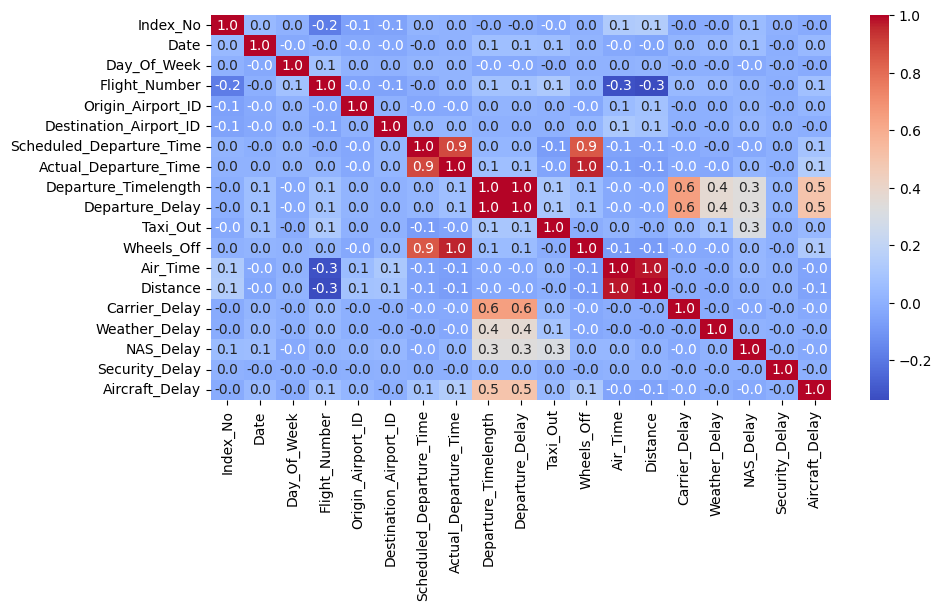

In [25]:
# Select only numeric columns from final_data for calculating the correlation matrix
numeric_cols = final_data.select_dtypes(include=['number'])

# Create correlation matrix for the numeric columns
correlation_matrix = numeric_cols.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.show()

# # Create correlation Matrix
# correlation_matrix = final_data.corr()

# # Display the correlation matrix as a heatmap
# plt.figure(figsize=(10, 5))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
# plt.show()

Heatmap is used to display the correlation among each variable in the dataset. Here we can see that there are few variables which are highly correlated with one another based on the hue of the colour.

Identify highly correlated columns

In [26]:
threshold = 0.9
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Find column pairs with high correlation
pairs_to_drop = [(col1, col2) for col1 in high_correlation.columns for col2 in high_correlation.index if high_correlation.loc[col1, col2]]

# Display the pairs to drop
print(pairs_to_drop)


[('Actual_Departure_Time', 'Wheels_Off'), ('Wheels_Off', 'Actual_Departure_Time'), ('Air_Time', 'Distance'), ('Distance', 'Air_Time')]


Remove highly correlated columns

In [27]:
columns_to_drop = []

# Drop one column from each correlated pair
for col1, col2 in pairs_to_drop:
    # Decide which column to drop (e.g., based on missing values or other criteria)
    if final_data[col1].isnull().sum() > final_data[col2].isnull().sum():
        drop_column = col1
    else:
        drop_column = col2

    columns_to_drop.append(drop_column)

# Drop the columns outside the loop
final_data = final_data.drop(columns=columns_to_drop, axis=1)


Highly correlated columns are removed in order to avoid multicollinearity in further steps.

Verify the correlation matrix

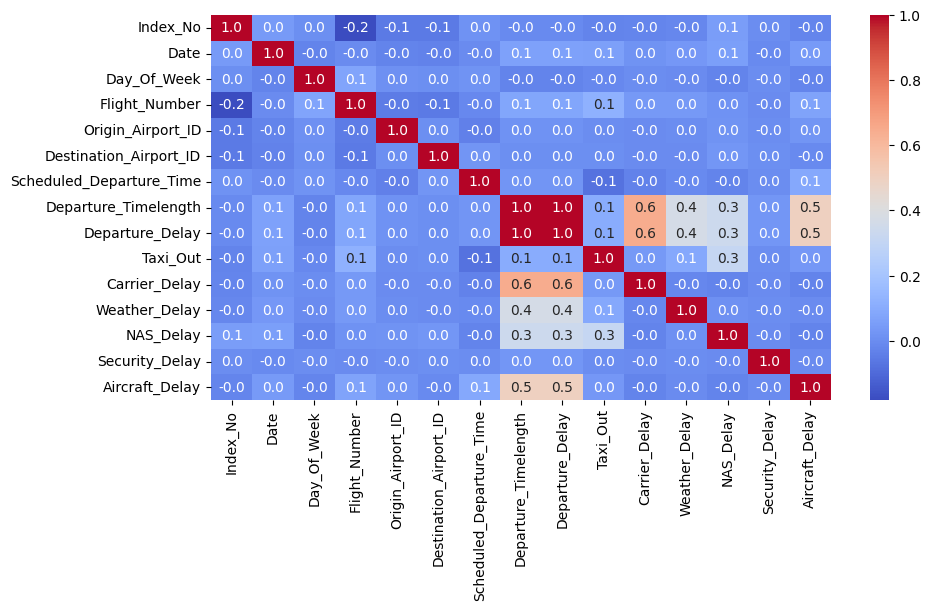

In [28]:
# Ensure to select only numeric columns for the correlation matrix
numeric_cols_after_removal = final_data.select_dtypes(include=['number'])

# Verify the correlation matrix after removal of non-numeric columns
correlation_matrix_after_removal = numeric_cols_after_removal.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix_after_removal, annot=True, cmap="coolwarm", fmt = ".1f")
plt.show()

The boxplot is showing correlation among the variables in the dataset once the higly correlated variables (correlation >= 0.90) are removed.

Boxplot to identify the outliers

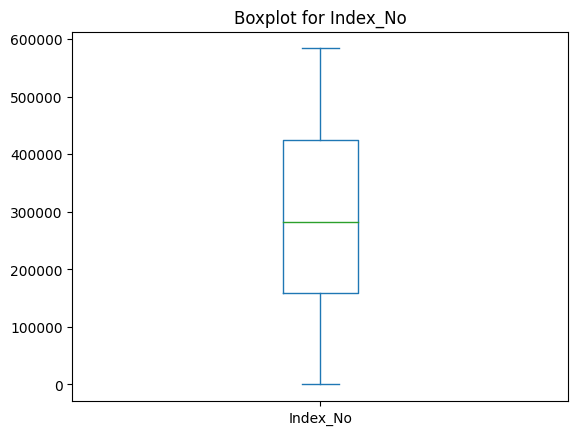

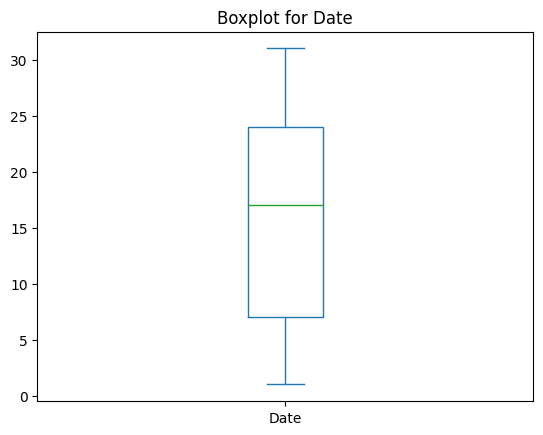

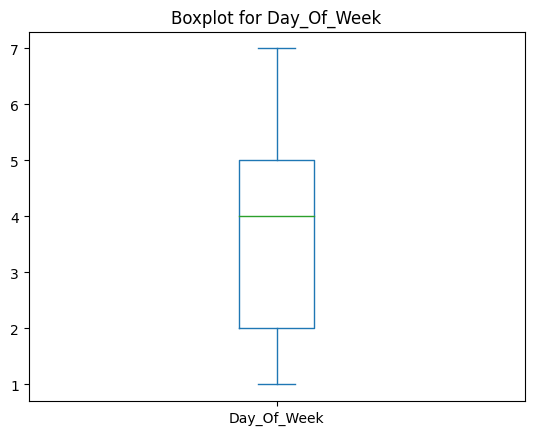

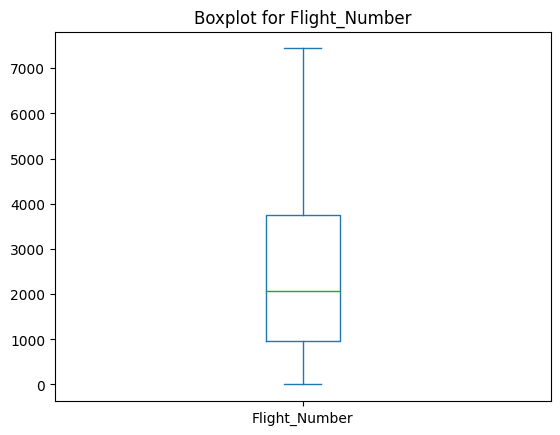

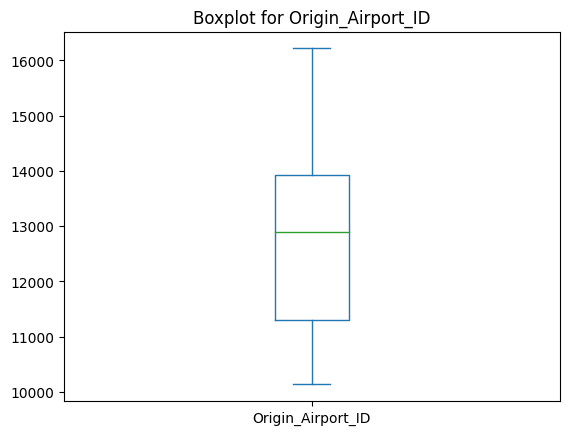

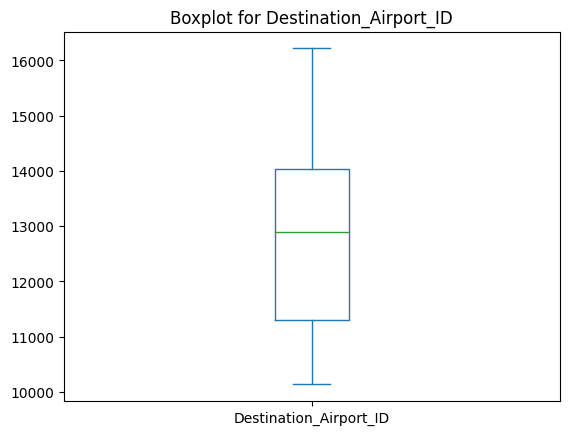

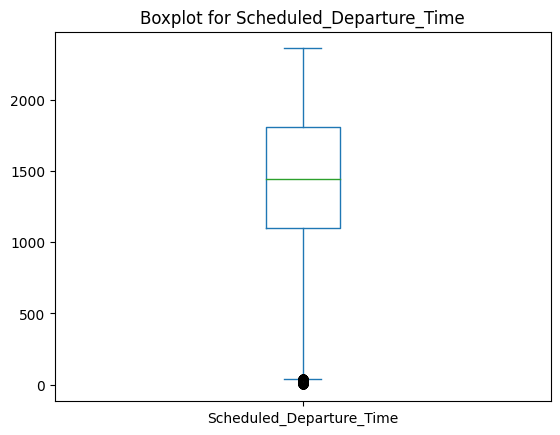

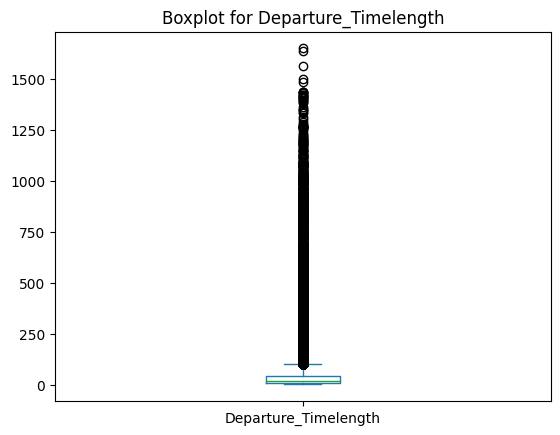

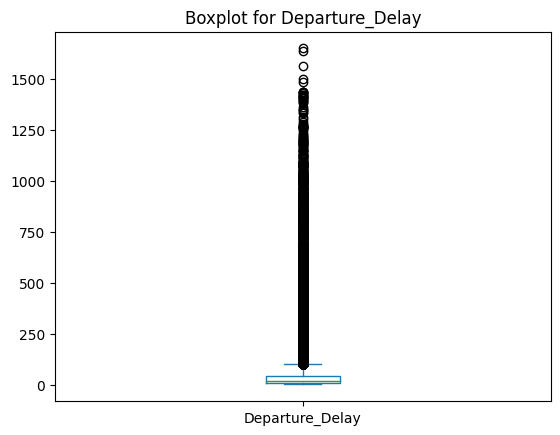

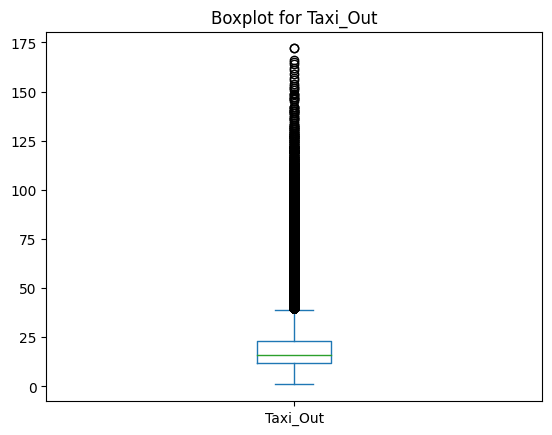

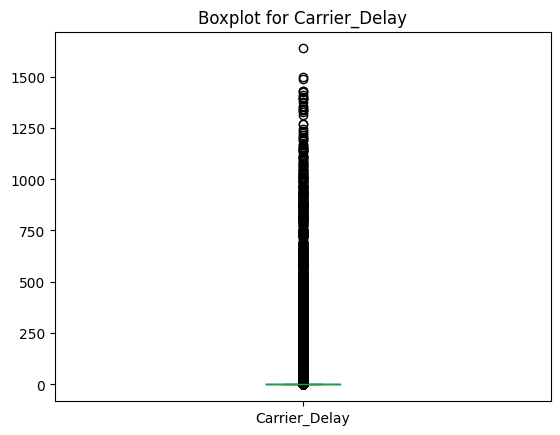

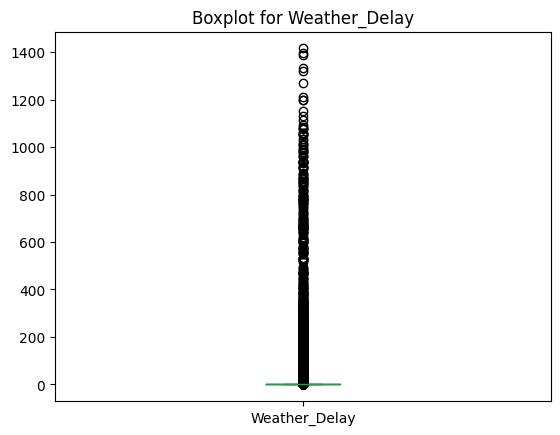

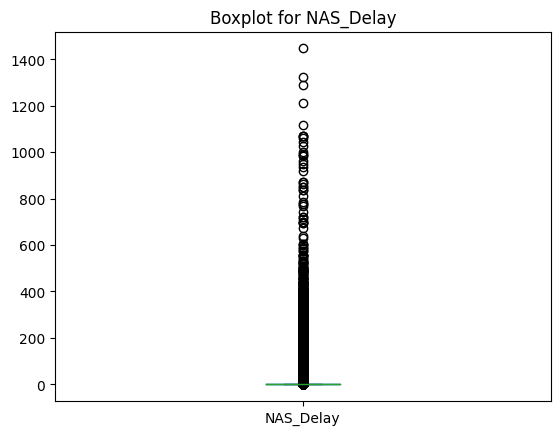

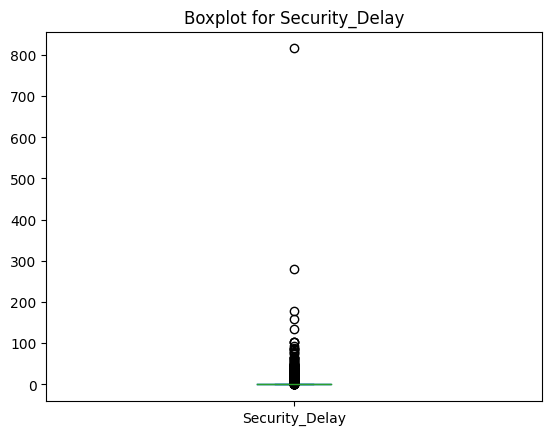

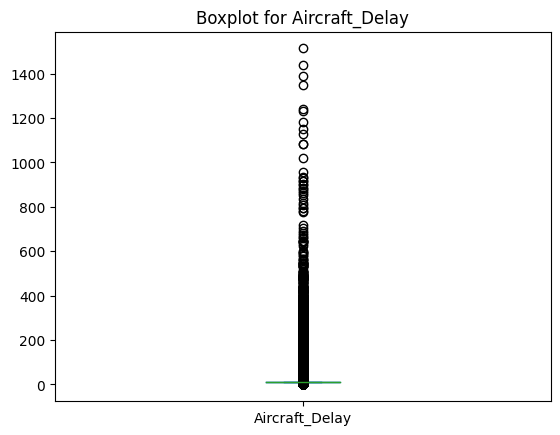

In [29]:
numeric_columns = final_data.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure()
    plt.title(f'Boxplot for {column}')
    final_data[column].plot(kind='box')
    plt.show()


Attributes that have outliers:

*   Scheduled_Departure_Time
*   Departure_Timelength
*   Departure_Delay
*   Taxi_Out
*   Carrier_Delay
*   Weather_Delay
*   Nas_Delay
*   Security_Delay
*   Aircraft_Delay











## Univariate Analysis

identify numerical column and assign it to a variable

In [30]:
# Identify numeric columns
numerical_columns = final_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = final_data.select_dtypes(include=['object']).columns

print(f'numerical columns: \n\n {numerical_columns} \n\n categorical column:\n\n {categorical_columns}')

numerical columns: 

 Index(['Index_No', 'Date', 'Day_Of_Week', 'Flight_Number', 'Origin_Airport_ID',
       'Destination_Airport_ID', 'Scheduled_Departure_Time',
       'Departure_Timelength', 'Departure_Delay', 'Taxi_Out', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Aircraft_Delay'],
      dtype='object') 

 categorical column:

 Index(['Reporting_Airline', 'Origin_State', 'Destination_State',
       'Departure_Time_Slot'],
      dtype='object')


Univariate analysis for integer datatype

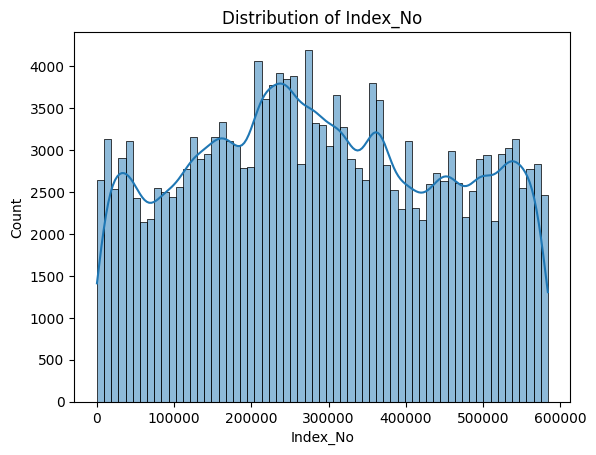

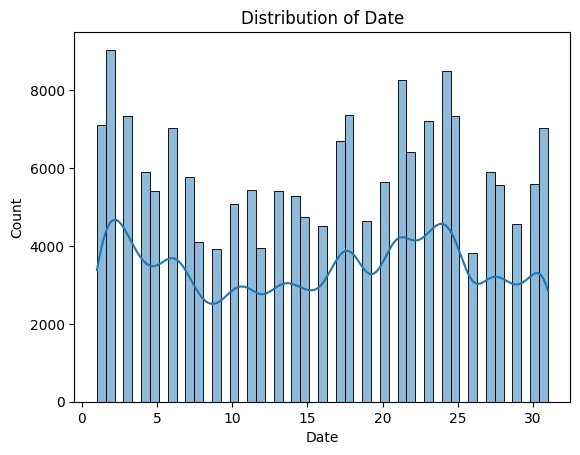

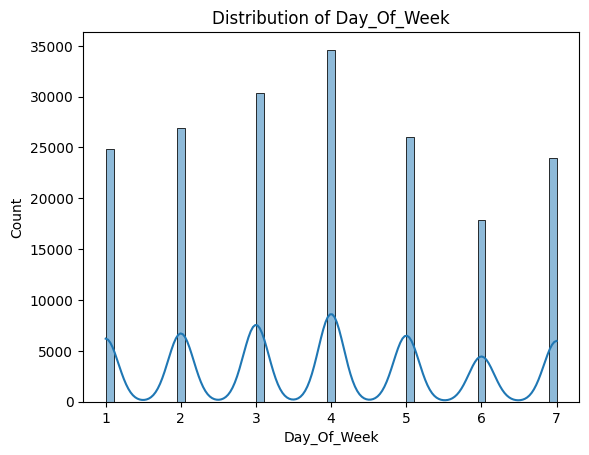

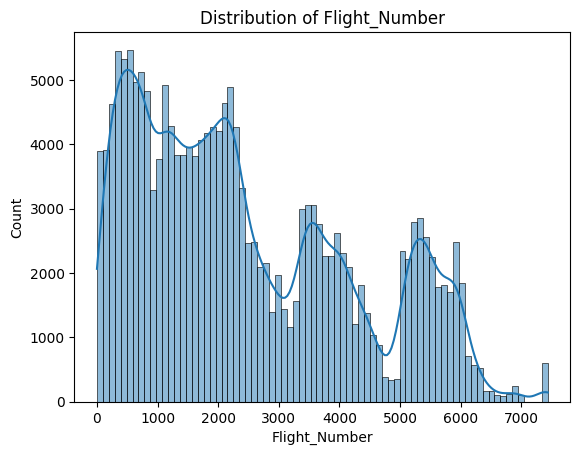

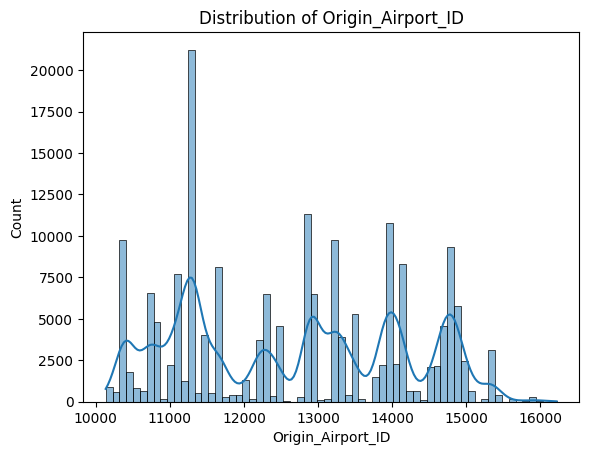

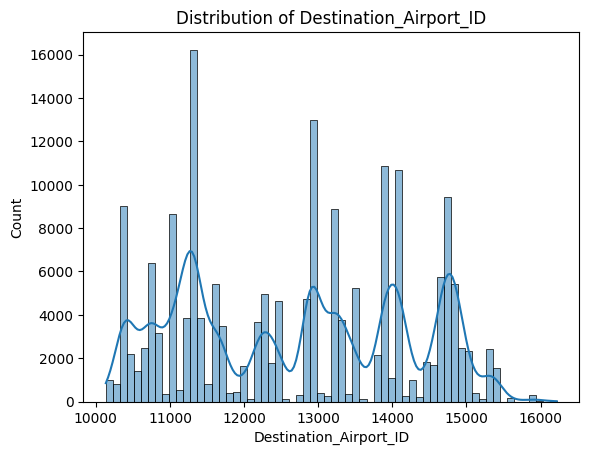

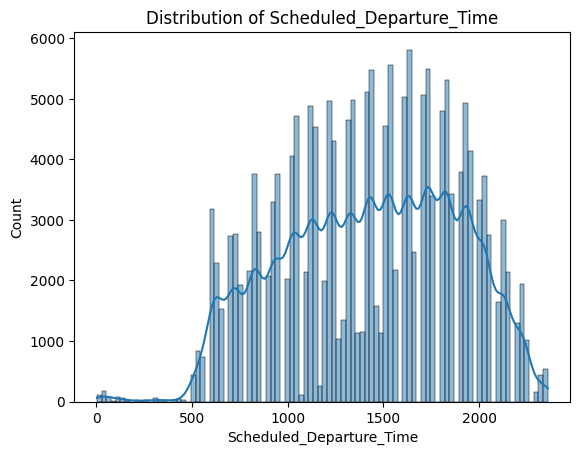

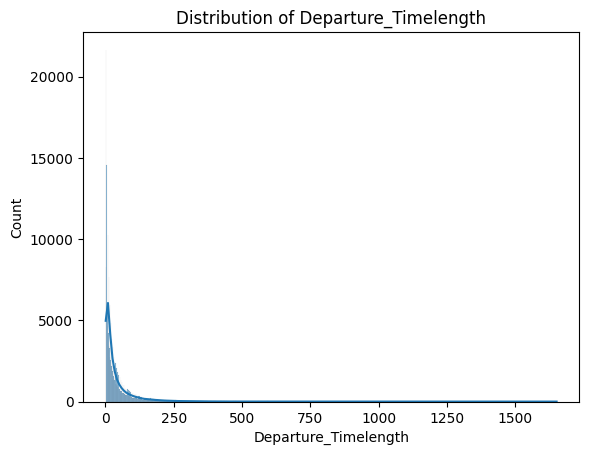

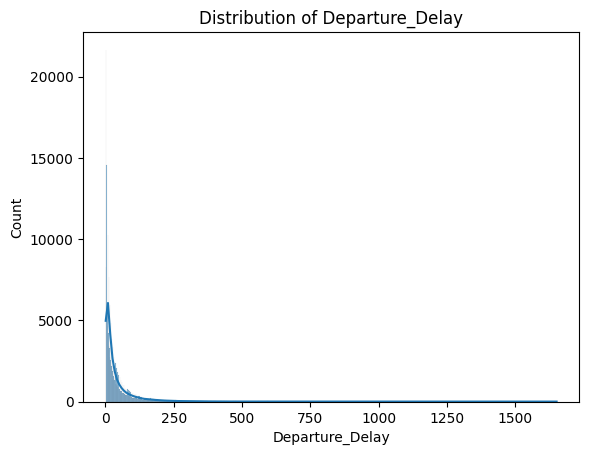

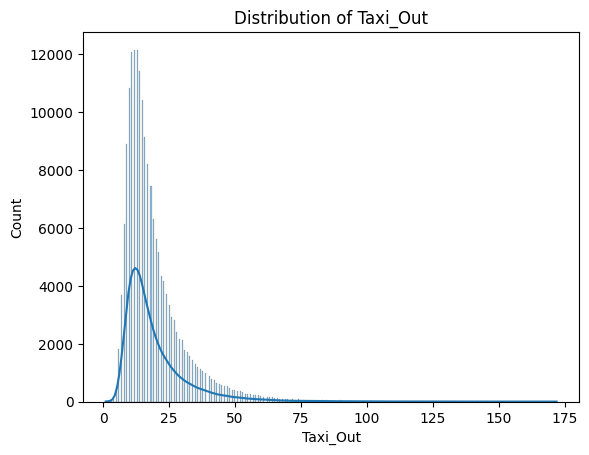

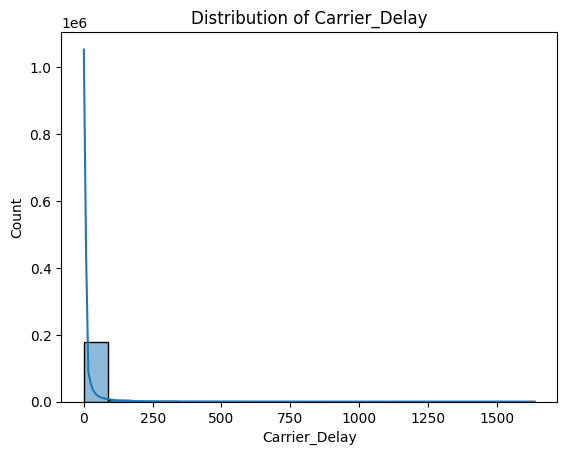

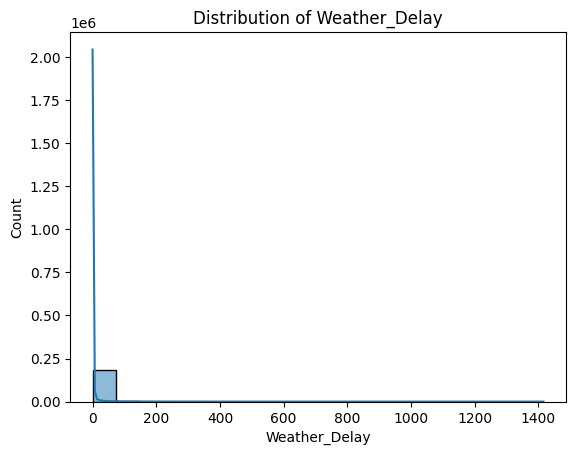

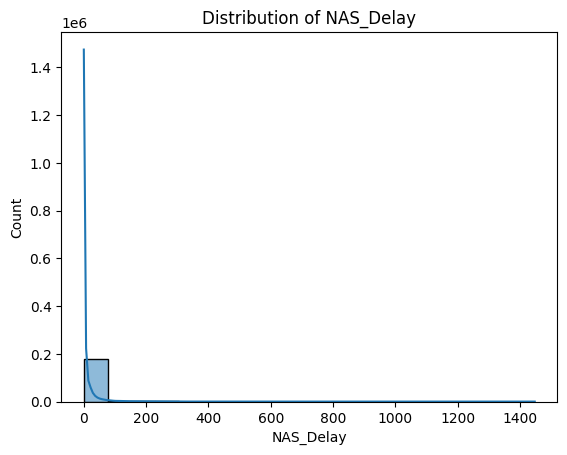

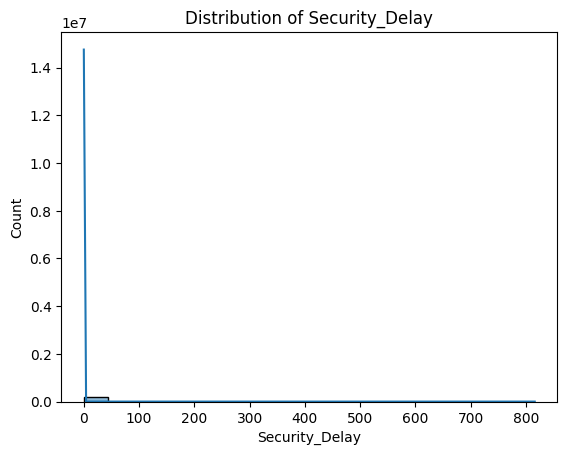

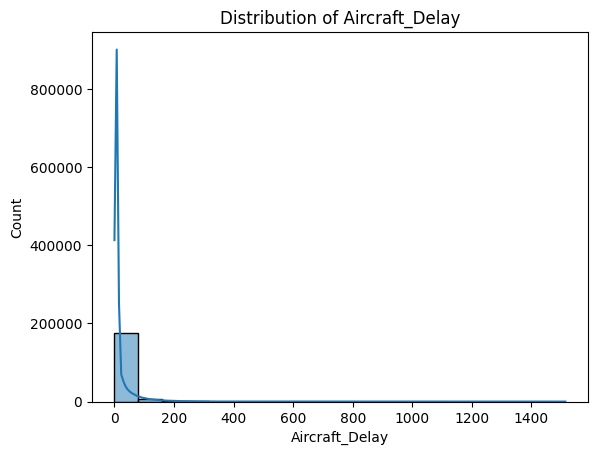

In [31]:
# Create histograms for all numeric variables
for column in numerical_columns:
    sns.histplot(final_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

univariate analysis for categorical columns

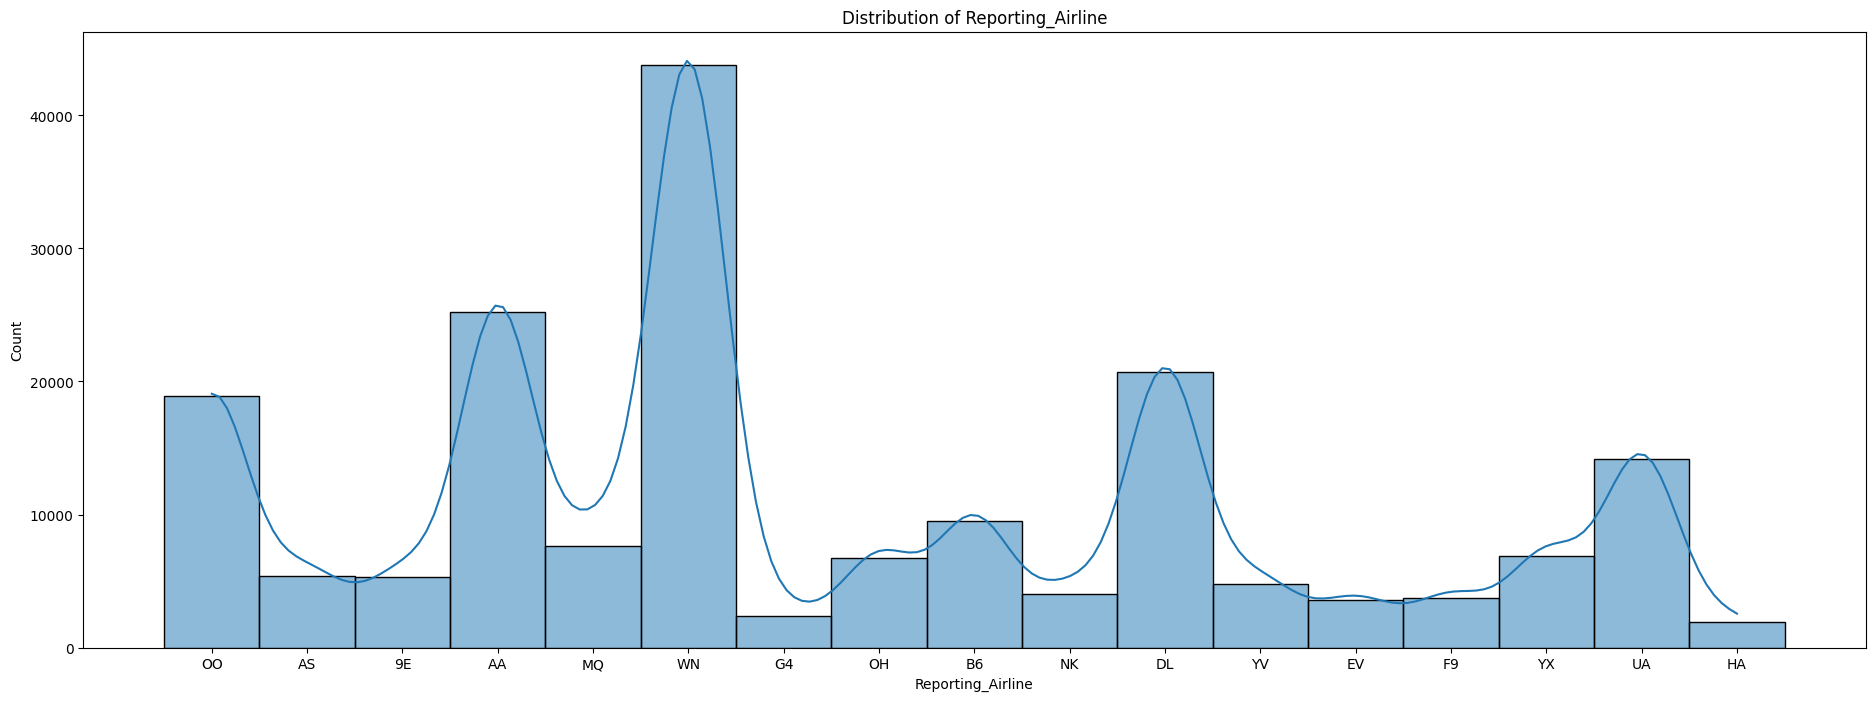

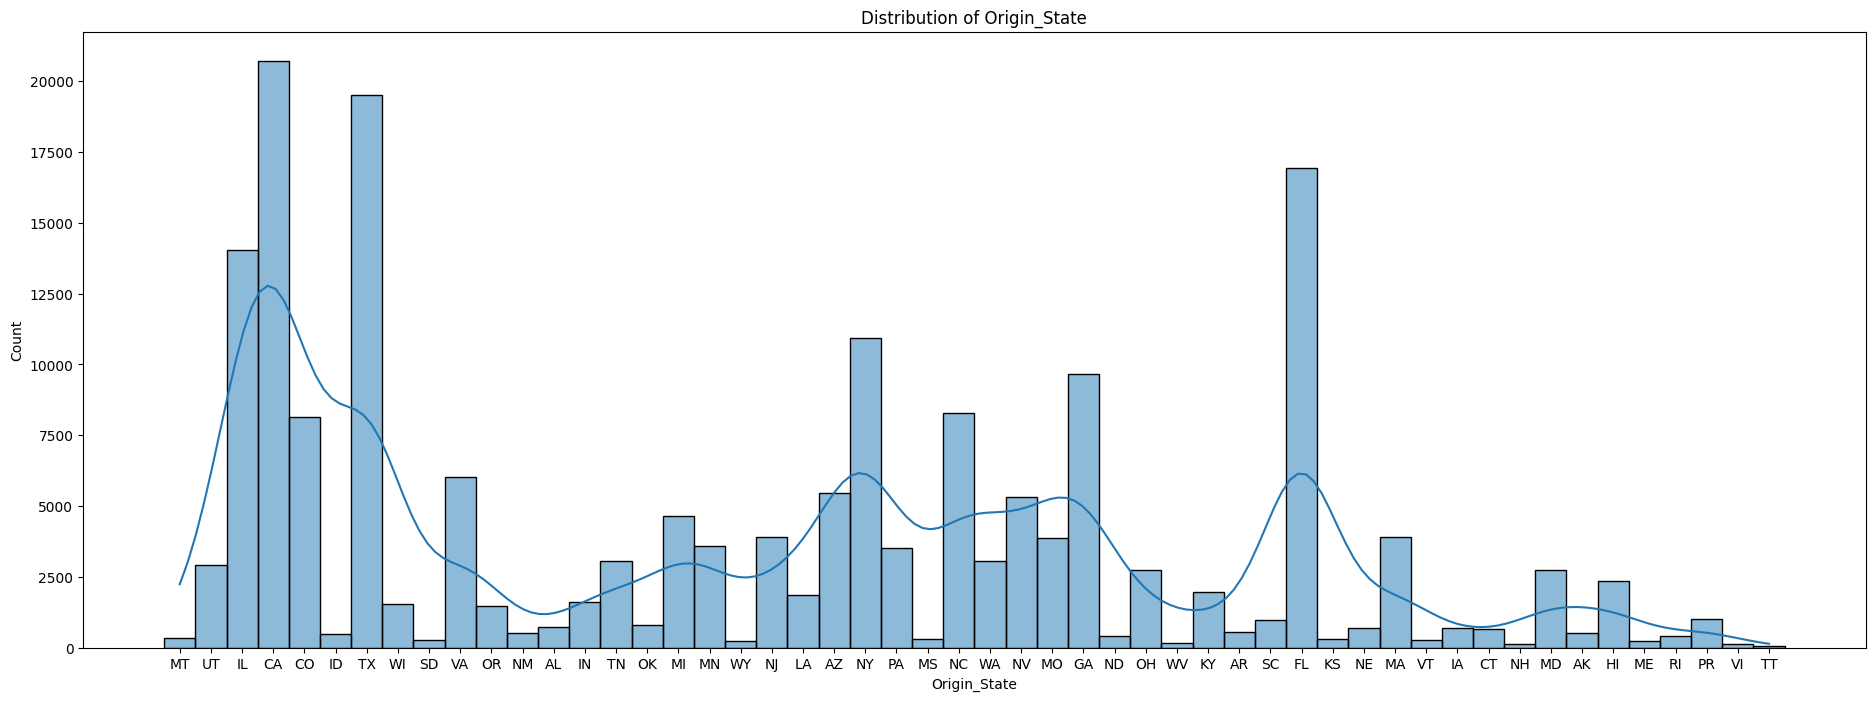

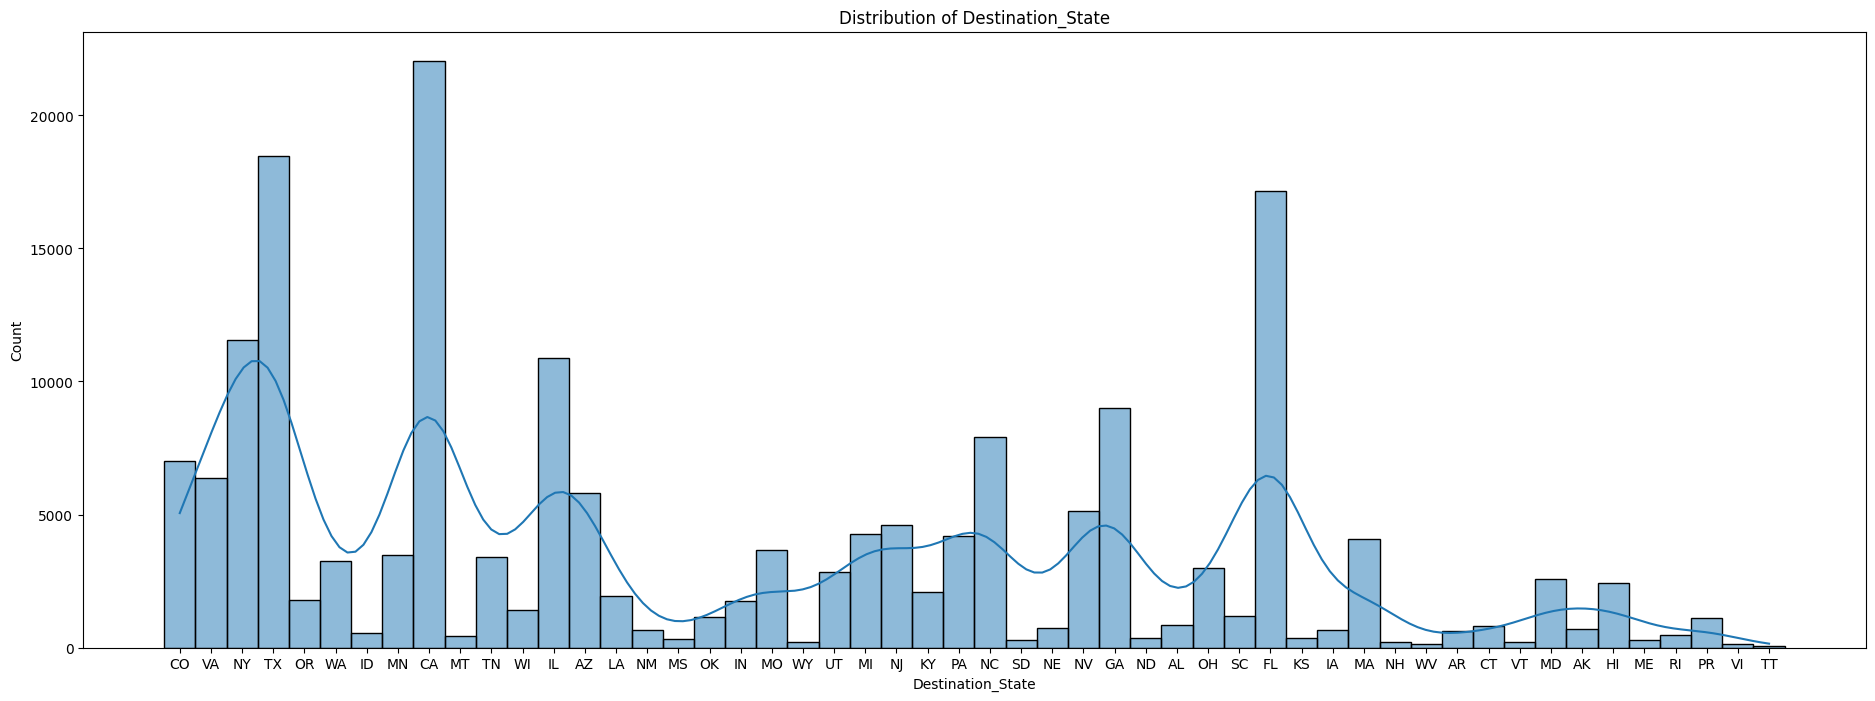

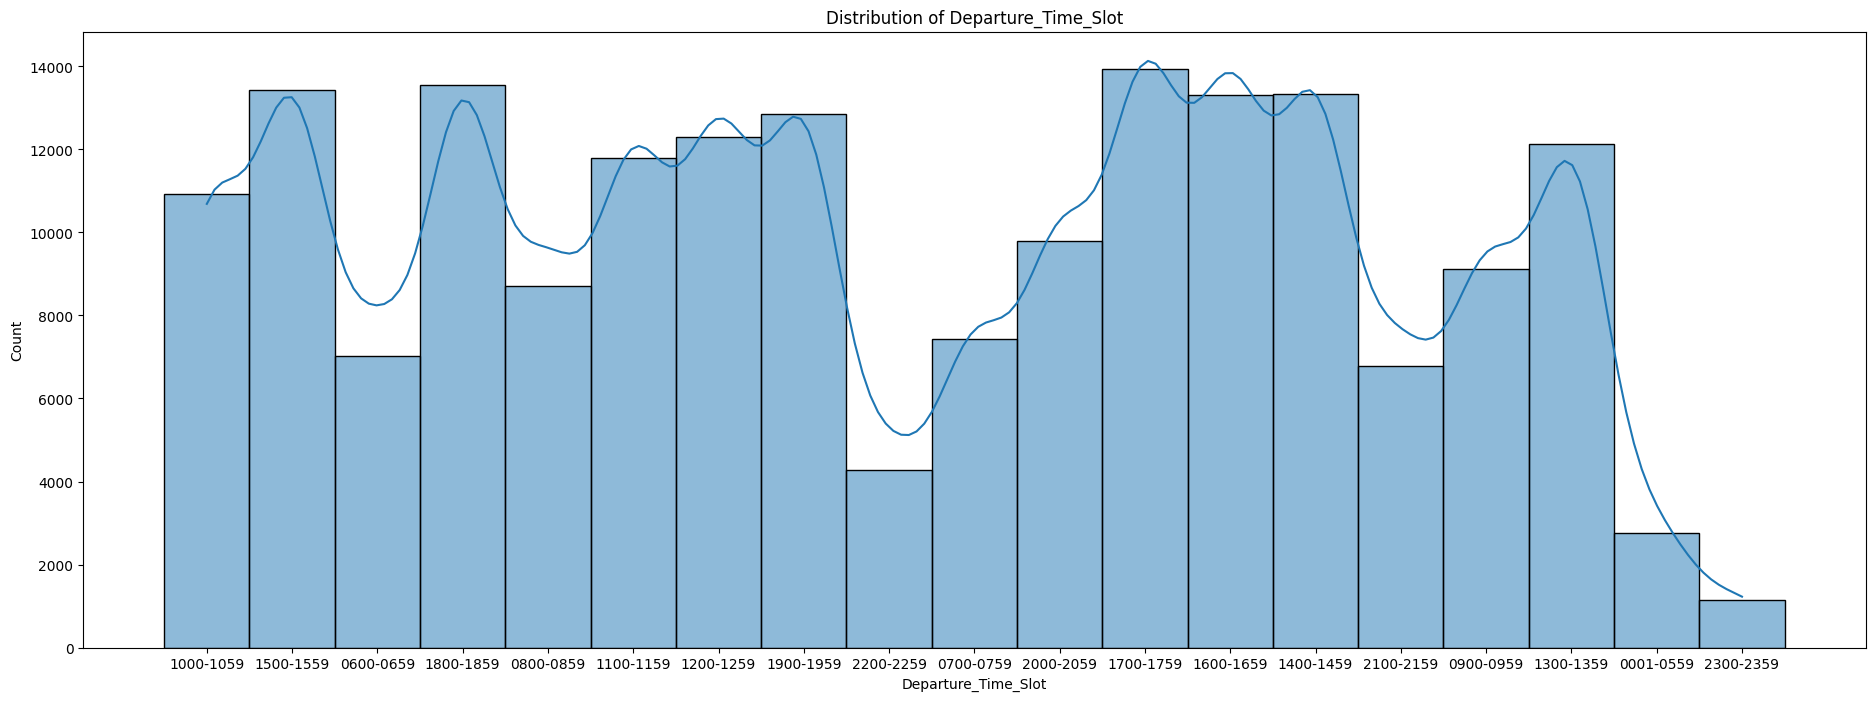

In [32]:
# Create histograms for all numeric variables
for column in categorical_columns:
    plt.figure(figsize=(23, 8))
    sns.histplot(final_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Bivariate Analysis

1. Scheduled_Departure_Time vs Departure_Delay



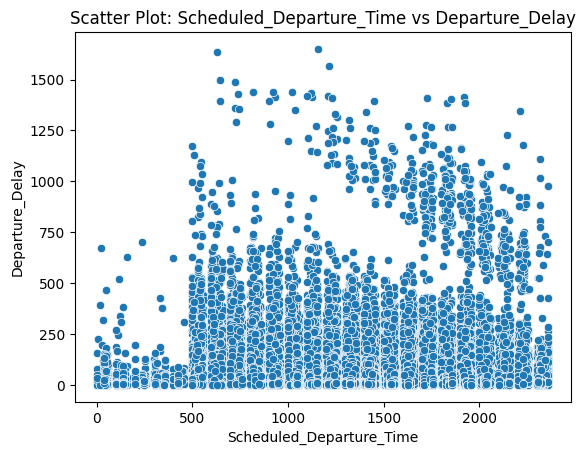

In [33]:
x_variable = 'Scheduled_Departure_Time'
y_variable = 'Departure_Delay'

# Create a scatter plot
sns.scatterplot(x=final_data[x_variable], y=final_data[y_variable])

plt.xlabel('Scheduled_Departure_Time')
plt.ylabel('Departure_Delay')
plt.title(f'Scatter Plot: {x_variable} vs {y_variable}')

# Show the plot
plt.show()

The scatterplot not forming a straight line suggests that the relationship between scheduled departure time and departure delay is not strictly linear. Instead, the relationship may be curved, indicating that the rate of change in departure delay is not constant across all values of scheduled departure time.  It's common in transportation data to observe time-of-day patterns. For example, there might be higher departure delays during certain hours of the day due to increased traffic, airport congestion, or other factors. This can result in a scatterplot that shows a curve or wave-like pattern.

2. Departure_Timelength vs Departure_Delay

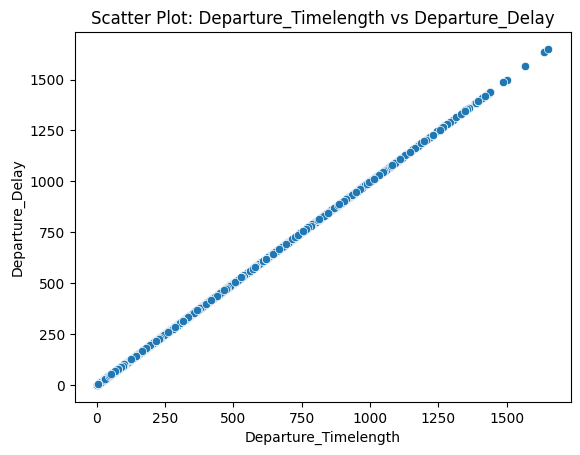

In [34]:
x_variable = 'Departure_Timelength'
y_variable = 'Departure_Delay'

# Create a scatter plot
sns.scatterplot(x=final_data[x_variable], y=final_data[y_variable])

plt.xlabel('Departure_Timelength')
plt.ylabel('Departure_Delay')
plt.title(f'Scatter Plot: {x_variable} vs {y_variable}')

# Show the plot
plt.show()

The above scatterplot shows the departure timelength vs departure delay graph. Here the departure timelength is directly proportional to departure delay. This positive trend shows that that longer departure times are associated with longer departure delays. The points on the scatterplot roughly fall along a straight line, indicating a linear correlation between the two variables. This suggests that there is a consistent rate of change in departure delay with respect to the departure time length.

3. Carrier_Delay vs Departure_Delay

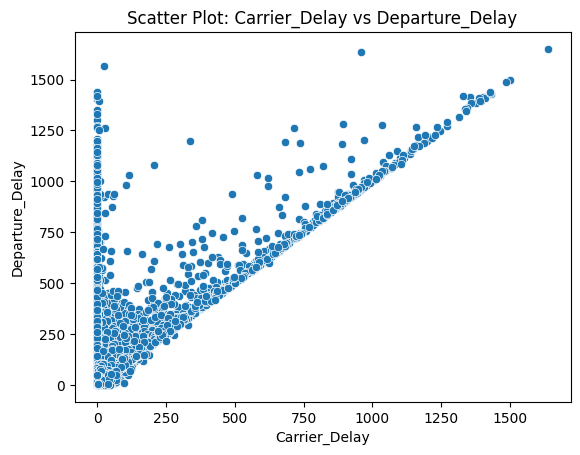

In [35]:
x_variable = 'Carrier_Delay'
y_variable = 'Departure_Delay'

# Create a scatter plot
sns.scatterplot(x=final_data[x_variable], y=final_data[y_variable])

plt.xlabel('Carrier_Delay')
plt.ylabel('Departure_Delay')
plt.title(f'Scatter Plot: {x_variable} vs {y_variable}')

# Show the plot
plt.show()

Certain data points form a directly proportional line. This means that as carrier delay increases, departure delay also increases, and the relationship between the two variables is roughly linear.Some data points form a straight line along the X-axis (carrier delay = 0) and extend vertically to the highest values on the Y-axis (departure delay). This suggests that there are instances where carrier delay is minimal (or zero), yet departure delay varies widely. This could indicate that other factors beyond carrier delay contribute significantly to departure delays in these cases. There are data points that scatter above the directly proportional line. This suggests that, for certain situations, departure delay is higher than what would be predicted solely based on carrier delay. Other factors, such as airport operations, weather conditions, or airline-specific practices, may be contributing to these departures delays beyond the carrier delay. The absence of data points below the proportional line indicates that, in the observed dataset, departure delays do not seem to be lower than what would be predicted based on carrier delay alone. This suggests that carrier delay plays a significant role in influencing departure delay, and departures with lower carrier delays also tend to have lower overall delays.





4. Departure_Delay vs Flight_Number

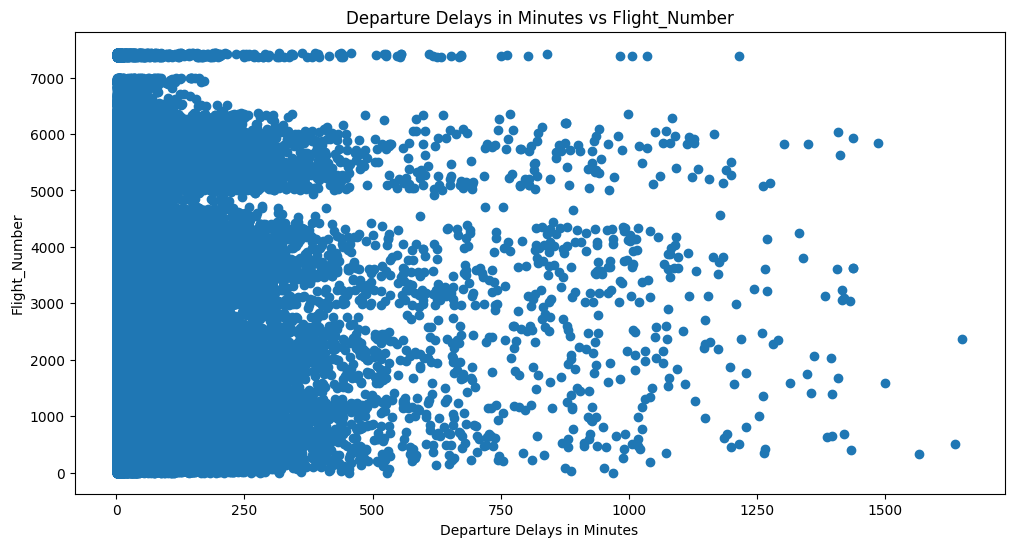

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(final_data['Departure_Delay'], final_data['Flight_Number'])
ax.set_xlabel('Departure Delays in Minutes')  # Corrected method name
ax.set_ylabel('Flight_Number')
ax.set_title('Departure Delays in Minutes vs Flight_Number')
plt.show()

The scatterplot illustrates the distribution of departure delays across various flight numbers. The left-skewed pattern indicates that a majority of flights experience minimal delays, forming a dense cluster on the left side. As departure delays increase, the density gradually fades towards the right, suggesting that fewer flights encounter longer delays. This distribution highlights the prevalence of on-time departures for a significant portion of flights, with a decreasing frequency of delays as we move towards flights with higher numbers.

## Multivariate Analysis

1. Scheduled_Departure_Time vs Departure_Timelength vs Departure_Delay

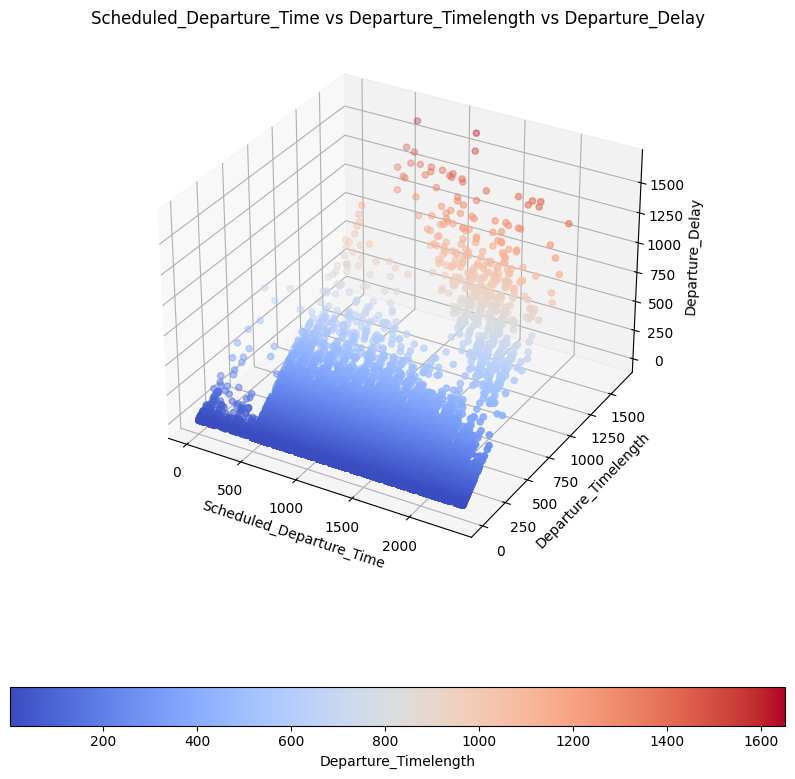

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing Scheduled_Departure_Time
sc = ax.scatter(final_data['Scheduled_Departure_Time'], final_data['Departure_Timelength'], final_data['Departure_Delay'],
                c=final_data['Departure_Timelength'], cmap='coolwarm', marker='o')

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, orientation='horizontal')
cbar.set_label('Departure_Timelength')

ax.set_xlabel('Scheduled_Departure_Time')
ax.set_ylabel('Departure_Timelength')
ax.set_zlabel('Departure_Delay')

ax.set_title('Scheduled_Departure_Time vs Departure_Timelength vs Departure_Delay')

plt.show()


The above graph shows the multivariate analysis between scheduled departure time, departure timelength and departure delay.  Analyzing trends over time provides insights into when delays are more prevalent.


2. Weather_Delay vs Aircraft_Delay vs Day_Of_Week

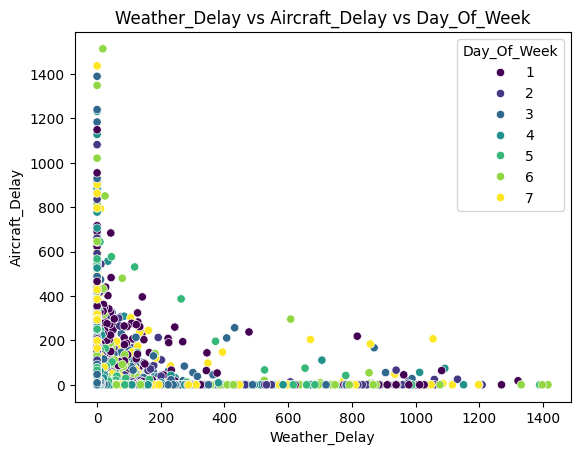

In [38]:
variables_to_analyze = ["Weather_Delay","Aircraft_Delay"]
category_column = "Day_Of_Week"

# Create a scatter plot
sns.scatterplot(x=variables_to_analyze[0], y=variables_to_analyze[1], hue=category_column, data=final_data, palette="viridis")
plt.title("Weather_Delay vs Aircraft_Delay vs Day_Of_Week")

# Show the plot
plt.show()


The above scatter plot displays each day of the week that experiences weather and aircraft delay. It shows that day 6 which is Saturday has the longest aircraft and weather delay time. This delay exceeds 1400 minutes that is equivalent to  23 hours. Day 1 which is Monday shows infrequent amount of time experiencing aircraft and weather delay that are longer than 800 minutes (13 hours).

3. Reporting_Airline vs Weather_Delay vs Day_Of_Week

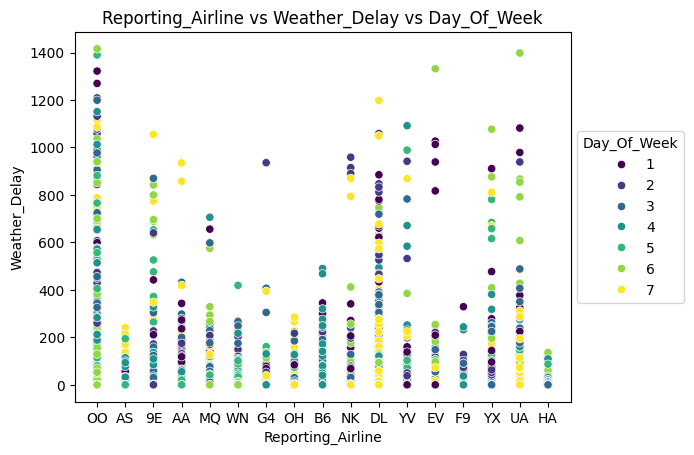

In [39]:
variables_to_analyze = ["Reporting_Airline", "Weather_Delay"]
category_column = "Day_Of_Week"

# Create a scatter plot
sns.scatterplot(x=variables_to_analyze[0], y=variables_to_analyze[1], hue=category_column, data=final_data, palette="viridis")

# Move the legend outside the graph
plt.legend(title='Day_Of_Week',loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Reporting_Airline vs Weather_Delay vs Day_Of_Week")

# Show the plot
plt.show()

The above scatter plot displays each day of the week that experiences weather delay in each of the reporting airline. This is to reveal which reporting airline that has the longest and shortest weather delay time. It can be seen that OO Airline has the longest weather delay time that occurs on day 6 (Saturday). On the other hand, AH Airline has the shortest weather delay time which occurs on day 6 (Saturday).

4. Scheduled_Departure_Time vs Departure_Delay vs Origin_Airport_ID

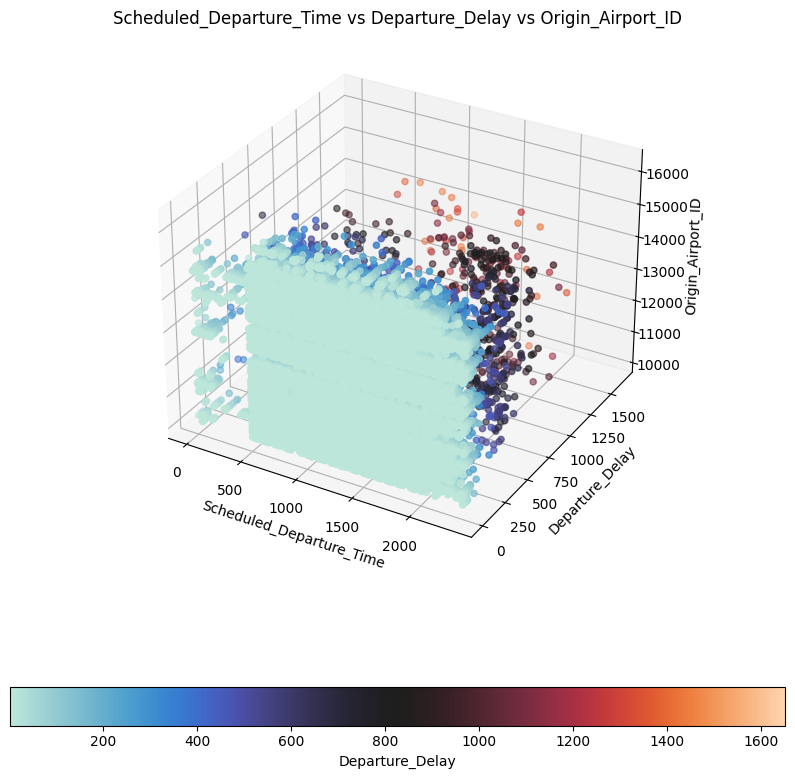

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing Scheduled_Departure_Time
sc = ax.scatter(final_data['Scheduled_Departure_Time'], final_data['Departure_Delay'], final_data['Origin_Airport_ID'],
                c=final_data['Departure_Delay'], cmap='icefire', marker='o')

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, orientation='horizontal')
cbar.set_label('Departure_Delay')

ax.set_xlabel('Scheduled_Departure_Time')
ax.set_ylabel('Departure_Delay')
ax.set_zlabel('Origin_Airport_ID')

ax.set_title('Scheduled_Departure_Time vs Departure_Delay vs Origin_Airport_ID')

plt.show()

The above graph shows the scheduled departure time in every airport along with its departure delay for every flight. It seems that the departure delay time which is longer than 1200 minutes (20 hours) can occur on any time. However its prevalence rate is not as high as the departure delay time that is between 0 minutes to 200 minutes. Yet, the airline company has to take actions to prevent these delays to occur to avoid customers attrition.

5. Departure_Time_Slot vs Departure_Delay vs Reporting_Airline

Text(0.5, 1.0, 'Departure_Time_Slot vs Departure_Delay vs Reporting_Airline')

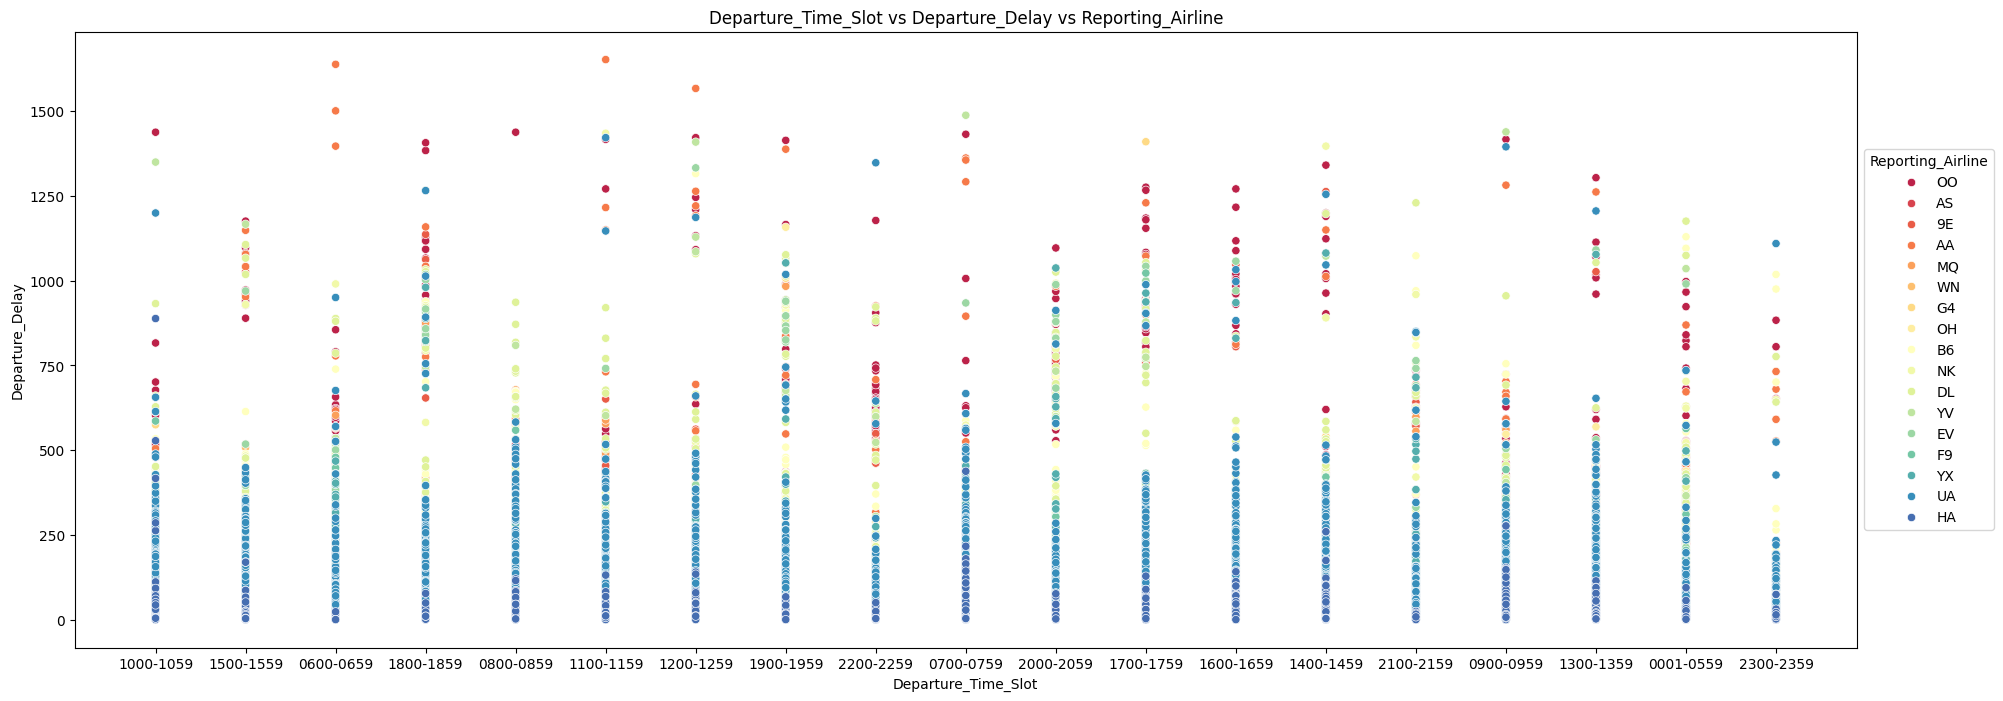

In [41]:
plt.figure(figsize=(23, 8))
sns.scatterplot(x=final_data['Departure_Time_Slot'], y=final_data['Departure_Delay'], hue=final_data['Reporting_Airline'], data=final_data, palette="Spectral")
plt.xlabel('Departure_Time_Slot')
plt.ylabel('Departure_Delay')
plt.legend(title='Reporting_Airline',loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Departure_Time_Slot vs Departure_Delay vs Reporting_Airline')

The above scatter plot displays the delay for every departure time slot in each reporting airline. UA Airline has many delays within 0 to 500 minutes in every departure time slot. Airline AA has the longest delay time which is more than 1500 minutes (25 hours) within departure time slot of 0600 to 0659, 1100 to 1159 and 1200 to 1259.

In [42]:
print (" The final dataset size is:\n\n",final_data.shape)

 The final dataset size is:

 (184595, 19)


In [43]:
final_data.head()

,Index_No,Date,Day_Of_Week,Reporting_Airline,Flight_Number,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Scheduled_Departure_Time,Departure_Timelength,Departure_Delay,Departure_Time_Slot,Taxi_Out,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Aircraft_Delay
0,7,4,5,OO,5665,10849,MT,11292,CO,1045,8.0,8.0,1000-1059,14.0,2.0,0.0,1.0,0.0,9.0
1,10,4,5,OO,5669,14869,UT,11292,CO,1536,5.0,5.0,1500-1559,12.0,2.0,0.0,1.0,0.0,9.0
2,11,4,5,OO,5670,13930,IL,14524,VA,645,23.0,23.0,0600-0659,23.0,13.0,0.0,3.0,0.0,10.0
3,20,4,5,OO,5679,13930,IL,15096,NY,1800,4.0,4.0,1800-1859,26.0,2.0,0.0,1.0,0.0,9.0
4,22,4,5,OO,5682,14771,CA,11298,TX,830,3.0,3.0,0800-0859,28.0,2.0,0.0,1.0,0.0,9.0


# Modelling & Evaluation


Several features are unique such as Index, Flight number and Date, thus will be excluded from the analysis run. And, redundant and derived variables are excluded from the run as well such as Origin state, Destination ID, Destination State, Scheduled, Actual, Time length and Time Slot of Departure, Taxi Out, Distance and Wheel Off.

## Modeling 1: Logistic Regression

Logistic regression stands as a statistical technique employed in constructing machine learning models when the outcome variable is dichotomous. Its primary function lies in elucidating data patterns and outlining the relationship between dependent variable with one or multiple independent variables.
Logistic Regression utilizes the sigmoid function, where the resulting probabilities fall within the range of zero to one.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Aircraft_Delay']
X = final_data[features]
y = (final_data['Departure_Delay'] > 120).astype(int) # Creating a binary label based on whether delay > 120 mins

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the train and test set
y_train_pred_lr = model.predict(X_train)
y_test_pred_lr = model.predict(X_test)

# Model evaluation results
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred_lr))
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred_lr))

# The confusion matrix
print("\nTraining Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_lr))
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))

# Model accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
print("Accuracy on the training set: %.2f%%" % (train_accuracy * 100.0))
accuracy = accuracy_score(y_test, y_test_pred_lr)
print("Accuracy on the testing set: %.2f%%" % (accuracy * 100.0))



Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    136517
           1       0.92      0.89      0.91     11159

    accuracy                           0.99    147676
   macro avg       0.96      0.94      0.95    147676
weighted avg       0.99      0.99      0.99    147676


Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     34063
           1       0.92      0.90      0.91      2856

    accuracy                           0.99     36919
   macro avg       0.96      0.95      0.95     36919
weighted avg       0.99      0.99      0.99     36919


Training Set Confusion Matrix:
[[135681    836]
 [  1209   9950]]

Testing Set Confusion Matrix:
[[33847   216]
 [  290  2566]]
Accuracy on the training set: 98.62%
Accuracy on the testing set: 98.63%


The high training accuracy suggests that the model has effectively learned patterns and relationships present in the training data.

The model's high and closely aligned training and testing accuracies indicate its strong likelihood of being well-generalized, without experiencing substantial overfitting.

## Modelling 2: XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [45]:
import xgboost as xgb
from xgboost import XGBClassifier

# Creating and fitting the XGBClassifier model
modelxgb = XGBClassifier()
modelxgb.fit(X_train, y_train)

# Making predictions on the train and test set
y_train_pred_xgb = modelxgb.predict(X_train)
y_test_pred_xgb = modelxgb.predict(X_test)

# Model evaluation results
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred_xgb))
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

# The confusion matrix
print("\nTraining Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_xgb))
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))

# Model accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
print("Accuracy on the training set: %.2f%%" % (train_accuracy * 100.0))
accuracy = accuracy_score(y_test, y_test_pred_xgb)
print("Accuracy on the testing set: %.2f%%" % (accuracy * 100.0))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    136517
           1       0.96      0.94      0.95     11159

    accuracy                           0.99    147676
   macro avg       0.98      0.97      0.97    147676
weighted avg       0.99      0.99      0.99    147676


Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34063
           1       0.95      0.93      0.94      2856

    accuracy                           0.99     36919
   macro avg       0.97      0.96      0.97     36919
weighted avg       0.99      0.99      0.99     36919


Training Set Confusion Matrix:
[[136112    405]
 [   696  10463]]

Testing Set Confusion Matrix:
[[33922   141]
 [  194  2662]]
Accuracy on the training set: 99.25%
Accuracy on the testing set: 99.09%


The testing accuracy of 99.09% indicates that the model performs well on new, unseen data. However, the fact that it is slightly lower than the training accuracy suggests that there might be some degree of overfitting.

## Modelling 3: Support Vector Machine for Classification

Support Vector Machine is a supervised machine learning algorithm used for both classification and regression. It can be used for linear or nonlinear classification and regression.SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

In [46]:
from sklearn.svm import SVC

# Creating and fitting the Support Vector Machine model
svc=SVC()
svc.fit(X_train, y_train)

# Making predictions on the train and test set
y_pred_svc=svc.predict(X_test)
y_train_pred_svc = svc.predict(X_train)

# Model evaluation results
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred_svc))
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_pred_svc))

# The confusion matrix
print("\nTraining Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_svc))
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

# Model accuracy
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
print("Accuracy on the training set: %.2f%%" % (train_accuracy_svc * 100.0))
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy on the testing set: %.2f%%" % (test_accuracy_svc * 100.0))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    136517
           1       0.96      0.93      0.94     11159

    accuracy                           0.99    147676
   macro avg       0.97      0.96      0.97    147676
weighted avg       0.99      0.99      0.99    147676


Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34063
           1       0.96      0.93      0.95      2856

    accuracy                           0.99     36919
   macro avg       0.98      0.96      0.97     36919
weighted avg       0.99      0.99      0.99     36919


Training Set Confusion Matrix:
[[136039    478]
 [   815  10344]]

Testing Set Confusion Matrix:
[[33948   115]
 [  191  2665]]
Accuracy on the training set: 99.12%
Accuracy on the testing set: 99.17%


The high accuracy in both training (99.12%) and testing (99.17%) set indicates that the model generalizes well. It is not overfitting to the training data and is able to make accurate predictions on new, unseen data. It also indicates that the model has learned the underlying patterns of departure delays.

## Modeling 4: Random Forest Classification

Random Forest is an ensemble learning method used for both classification and regression. Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. It is based on the concept of ensemble learning which is a process of combining multiple classifiers to solve a complex problem and improve the performance of the mode

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200]}

# Creating and fitting the Random Forest Classification model
rfc = RandomForestClassifier()

#Getting the best estimator for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Getting the best estimator from the grid search
best_rfc = grid_search.best_estimator_

# Making predictions on the train and test set using the best estimator
y_pred_rfc = best_rfc.predict(X_test)
y_train_pred_rfc = best_rfc.predict(X_train)

# Model evaluation results
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred_rfc))
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_pred_rfc))

# The confusion matrix
print("\nTraining Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rfc))
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfc))

# Model accuracy
train_accuracy_rfc = accuracy_score(y_train, y_train_pred_rfc)
print("Accuracy on the training set: %.2f%%" % (train_accuracy_rfc * 100.0))
test_accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy on the testing set: %.2f%%" % (test_accuracy_rfc * 100.0))


#Display the best hyperparameters from the grid search
print("\nBest Hyperparameters:", grid_search.best_params_)


Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136517
           1       0.98      0.97      0.97     11159

    accuracy                           1.00    147676
   macro avg       0.99      0.98      0.98    147676
weighted avg       1.00      1.00      1.00    147676


Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34063
           1       0.95      0.94      0.94      2856

    accuracy                           0.99     36919
   macro avg       0.97      0.97      0.97     36919
weighted avg       0.99      0.99      0.99     36919


Training Set Confusion Matrix:
[[136242    275]
 [   371  10788]]

Testing Set Confusion Matrix:
[[33913   150]
 [  172  2684]]
Accuracy on the training set: 99.56%
Accuracy on the testing set: 99.13%

Best Hyperparameters: {'n_estimators': 200}


The accuracy in the testing set (99.11%) shows that it is slightly lower than the training set (99.56%) and this suggests that the model might not generalize well to the unseen data, indicating a potential concern for overfitting.

# Result & Discussion

The initial focus of the study was on the continuous form of the dependent variable, specifically the delay in departure. To enhance actionable insights, the decision was made to dichotomize delays into exceeding or not exceeding 2 hours. This classification aims to offer a clearer direction for potential actions by airline management, facilitating plans for assistance like food, accommodation, or compensation as necessary.


Key measures for modeling, namely 'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay', and 'Aircraft_Delay', were selected after a meticulous process of excluding irrelevant features and highly correlated attributes. This rigorous approach was undertaken to ensure the robustness and reliability of the results obtained.


During the preprocessing stage, a considerable number of missing values were observed, particularly in key measures, demanding careful treatment. Following a comprehensive assessment, it was found that median imputation yielded effective alignment with the modeling process, demonstrating high-performance metric scores across the selected models. The choice of median imputation was influenced by the skewness evident in the data, rendering mean imputation unsuitable for the skewed dataset. Detailed model performances have been included in the appendix for reference purposes.


After thorough comparisons between Logistic Regression, XGBoost Classifier, Support Vector Machine (SVM), and Random Forest, SVM emerges as the most optimal choice for predicting departure delays. The model shows excellent performance in both training and testing sets with high accuracy, precision, recall and F1 scores. There is no significant sign of overfitting, as the model generalizes well to the testing set. The analysis reveals that SVM achieves the highest accuracy among the four models, underscoring its effectiveness in capturing the complexities inherent in the dataset.


While Logistic Regression, XGBoost Classifier, and Random Forest models demonstrated commendable performance on both the training and testing sets, they were not selected as the best models for predicting departure delays. Logistic Regression showed high accuracy but exhibited slightly lower recall in the testing set for the positive class (delayed flights). XGBoost, while achieving impressive accuracy, precision, and recall, did not surpass the performance of the selected SVM in terms of overall accuracy and sensitivity. Random Forest, though powerful, also fell short of SVM's accuracy and predictive capability. The SVM model, with its consistently superior accuracy and ability to capture nuanced patterns in the data, emerged as the most reliable choice for meeting the research objective. The decision to choose SVM was reinforced by its robust performance metrics and its effectiveness in handling the complexities inherent in the dataset.

# Conclusion

The selected **SVM model**, trained on historical flight data, has demonstrated superior predictive capabilities in accurately anticipating departure delays exceeding two hours.It stands as a reliable and effective solution for empowering airline operations with actionable insights to mitigate delays and optimize overall operational performance.

# Appendix

Internally, a series of trials were conducted to evaluate various methodologies for addressing missing values observed in key attributes. The analysis resulted in the selection of median imputation, as it exhibited enhanced model performance compared to other strategies across the chosen machine learning models.

Below is the findings derived from our internal investigation into deletion of missing values and backward filling techniques.

## Deletion of Missing Values

In [ ]:
#Drop missing values
new_flight10 = new_flight10.dropna()

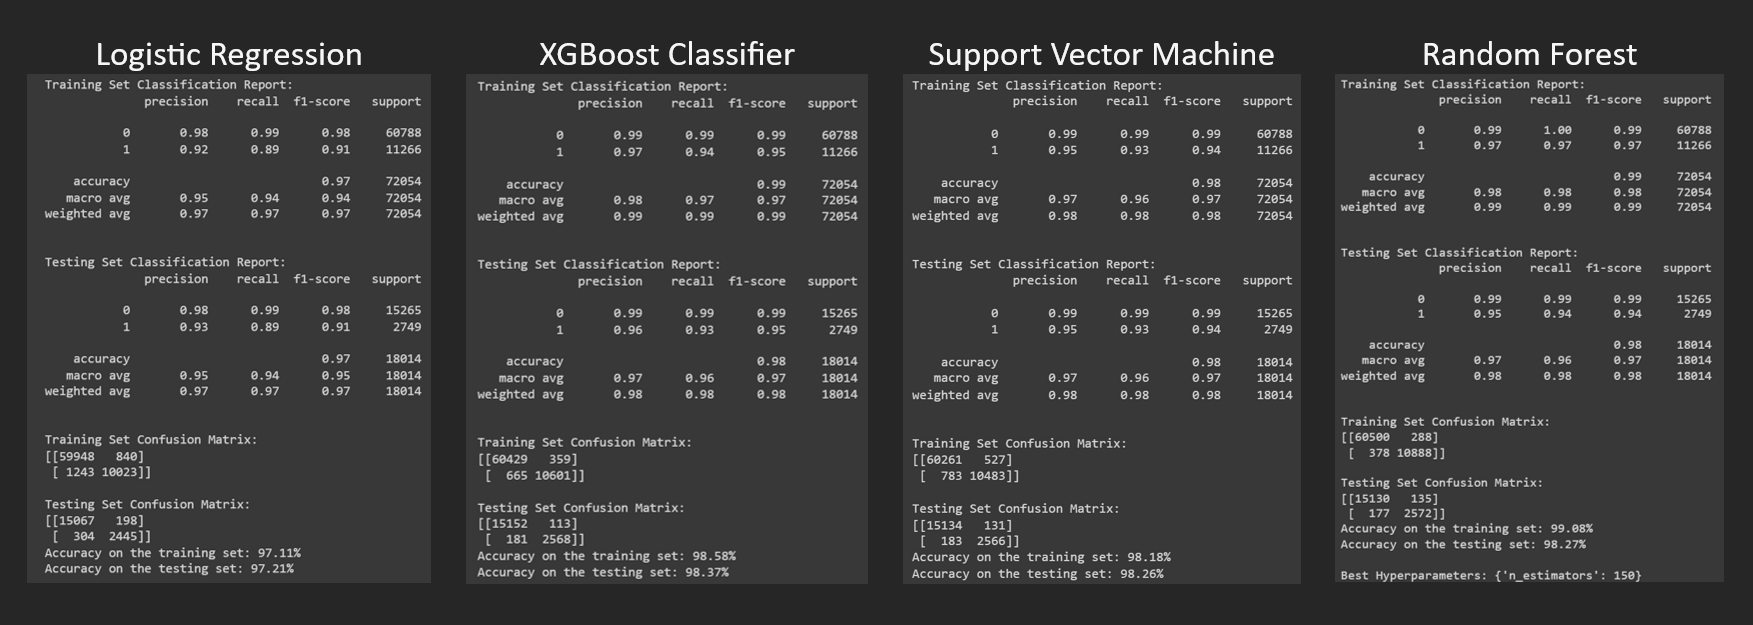

## Forward and Backward Filling Method

In [ ]:
#Forward and Backward Filling Method
new_flight10 = new_flight10. fillna(method='bfill')

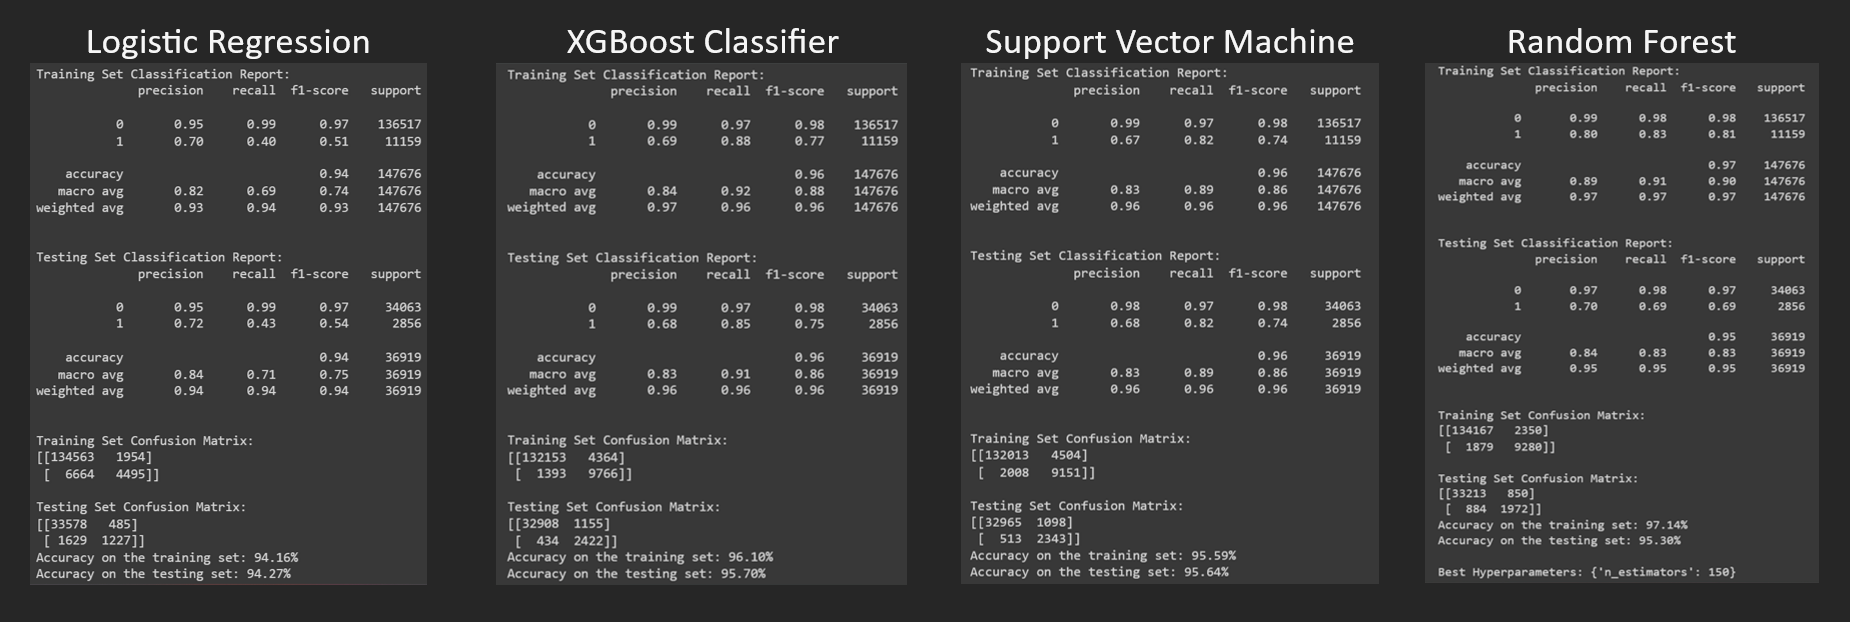